### **Business Case - INX Future INC. - Employee Performance Analysis**

---


##### **Domain Analysis**

INX Future Inc, is one of the leading data analytics and automation solutions provider with over 15 years of global business presence. INX is consistently rated as top 20 best employers past 5 years. INX human resource policies are considered as employee friendly and widely perceived as best practices in the industry. In recent years, the employee performance indexes are not healthy and this has become a growing concern among the top management.


The CEO Mr. Brain, decided to initiate a data science project, which analyzes the current employee data and find the core underlying causes of the employee performance issues. He also expects a clear indicators of non-performing employees, so that any penalization of non-performing employee, if required, may not significantly affect other employee morals.



##### **Aim of the Project**

The goal is to help INX Future Inc. understand why **employee performance** is declining and to **provide actionable insights**

### **Initial Exploration**

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings # # Used to supress the warnings
warnings.filterwarnings('ignore')

%matplotlib inline
print ('Set up complete')

# importing essential python libraries

Set up complete


### **Connection to Drive**

In [6]:
#from google.colab import drive
#drive.mount("/content/drive/")

# Connecting the drive with colab

### **Importing Raw Data**

In [7]:
#Data = pd.read_excel("/content/drive/My Drive/Jupyter/INX.xls")  #alternative way to load

#file_path = "/content/drive/My Drive/Jupyter/INX.xls"
#data = pd.read_excel(file_path)
#pd.set_option('display.max_columns',None)

file_path = r"C:\Users\HP\Employee_Performance_Analysis\Data\raw\INX_data.csv"
data = pd.read_csv(file_path)
pd.set_option('display.max_columns',None)

print("Data loaded successfully")


# Loading the data and creating a dataframe
# spaces are important for loading the file from folders

Data loaded successfully


#### **About Each Feature :-**

- **EmpNumber** shows the unique ID number of each employee and is not required for modeling and analysis.  
- **Age** shows how old an employee is.  
- **Gender** is the sex of an employee (Male, Female, Transgender).  
- **EducationBackground** is the specialization or field in which the employee studied.  
- **MaritalStatus** shows whether the employee is married or not (Married, Unmarried, Single).  
- **EmpDepartment** is the department in which the employee works.  
- **EmpJobRole** shows the position or job title of the employee.  
- **BusinessTravelFrequency** means how frequently the employee travels for business purposes.  
- **DistanceFromHome** is the distance between the employee’s home and the workplace.  
- **EmpEducationLevel** represents the highest qualification achieved by the employee.  
- **EmpEnvironmentSatisfaction** is a rating of the work environment or culture in which the employee works.  
- **EmpHourlyRate** shows the hourly wage of the employee.  
- **EmpJobInvolvement** indicates the employee's level of emotional involvement and dedication to their job.  
- **EmpJobLevel** is the employee's rank or level within the organizational hierarchy.  
- **EmpJobSatisfaction** indicates the level of satisfaction an employee feels in their current role.  
- **NumCompaniesWorked** shows the number of companies the employee has worked before.  
- **OverTime** indicates whether an employee works beyond regular working hours.  
- **EmpLastSalaryHikePercent** is the percentage increase in the employee's salary during their last hike.  
- **EmpRelationshipSatisfaction** shows the employee's satisfaction with relationships at work (colleagues, supervisors, team).  
- **TotalWorkExperienceInYears** is the total number of years the employee has worked across their career.  
- **TrainingTimesLastYear** is the number of training sessions the employee attended last year.  
- **EmpWorkLifeBalance** shows how well the employee balances professional and personal life.  
- **ExperienceYearsAtThisCompany** indicates the number of years the employee has worked at the current company.  
- **ExperienceYearsInCurrentRole** represents the number of years the employee has spent in their current role or position.  
- **YearsSinceLastPromotion** indicates how many years have passed since the employee's last promotion.  
- **YearsWithCurrManager** shows the number of years the employee has worked under their current manager.  
- **Attrition** is used to determine whether an employee has left the organization or is still employed.  
- **PerformanceRating** represents the employee's performance score within the organization. This is our target variable for prediction.  


### **Basic Checks**

In [8]:
data.shape #checking shape of data

(1200, 28)

In [9]:
data.head(5) #checking first 5 records

,EmpNumber,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,E1001000,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,4,55,3,2,4,1,No,12,4,10,2,2,10,7,0,8,No,3
1,E1001006,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,4,42,3,2,1,2,No,12,4,20,2,3,7,7,1,7,No,3
2,E1001007,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,4,48,2,3,1,5,Yes,21,3,20,2,3,18,13,1,12,No,4
3,E1001009,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,2,73,2,5,4,3,No,15,2,23,2,2,21,6,12,6,No,3
4,E1001010,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,1,84,3,2,1,8,No,14,4,10,1,3,2,2,2,2,No,3


In [10]:
data.columns #checking columns

Index(['EmpNumber', 'Age', 'Gender', 'EducationBackground', 'MaritalStatus',
       'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency',
       'DistanceFromHome', 'EmpEducationLevel', 'EmpEnvironmentSatisfaction',
       'EmpHourlyRate', 'EmpJobInvolvement', 'EmpJobLevel',
       'EmpJobSatisfaction', 'NumCompaniesWorked', 'OverTime',
       'EmpLastSalaryHikePercent', 'EmpRelationshipSatisfaction',
       'TotalWorkExperienceInYears', 'TrainingTimesLastYear',
       'EmpWorkLifeBalance', 'ExperienceYearsAtThisCompany',
       'ExperienceYearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition', 'PerformanceRating'],
      dtype='object')

In [11]:
data.info() # checking data information

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1200 entries, 0 to 1199
Data columns (total 28 columns):
 #   Column                        Non-Null Count  Dtype 
---  ------                        --------------  ----- 
 0   EmpNumber                     1200 non-null   object
 1   Age                           1200 non-null   int64 
 2   Gender                        1200 non-null   object
 3   EducationBackground           1200 non-null   object
 4   MaritalStatus                 1200 non-null   object
 5   EmpDepartment                 1200 non-null   object
 6   EmpJobRole                    1200 non-null   object
 7   BusinessTravelFrequency       1200 non-null   object
 8   DistanceFromHome              1200 non-null   int64 
 9   EmpEducationLevel             1200 non-null   int64 
 10  EmpEnvironmentSatisfaction    1200 non-null   int64 
 11  EmpHourlyRate                 1200 non-null   int64 
 12  EmpJobInvolvement             1200 non-null   int64 
 13  EmpJobLevel       

#### **Insights From data.info()**

* The INX dataset contains 1200 entries, numbered from 0 to 1199.
* There are total of 28 columns in the dataset, with 19 columns having the "int64" data type, and 9 columns having the "object" data type.
* The columns do not have null values.

In [12]:
data.describe() # statistical analysis of numerical columns

,Age,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,PerformanceRating
count,1200.000000,1200.000000,1200.00000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000,1200.000000
mean,36.918333,9.165833,2.89250,2.715833,65.981667,2.731667,2.067500,2.732500,2.665000,15.222500,2.725000,11.330000,2.785833,2.744167,7.077500,4.291667,2.194167,4.105000,2.948333
std,9.087289,8.176636,1.04412,1.090599,20.211302,0.707164,1.107836,1.100888,2.469384,3.625918,1.075642,7.797228,1.263446,0.699374,6.236899,3.613744,3.221560,3.541576,0.518866
min,18.000000,1.000000,1.00000,1.000000,30.000000,1.000000,1.000000,1.000000,0.000000,11.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,2.000000
25%,30.000000,2.000000,2.00000,2.000000,48.000000,2.000000,1.000000,2.000000,1.000000,12.000000,2.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,3.000000
50%,36.000000,7.000000,3.00000,3.000000,66.000000,3.000000,2.000000,3.000000,2.000000,14.000000,3.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,3.000000
75%,43.000000,14.000000,4.00000,4.000000,83.000000,3.000000,3.000000,4.000000,4.000000,18.000000,4.000000,15.000000,3.000000,3.000000,10.000000,7.000000,3.000000,7.000000,3.000000
max,60.000000,29.000000,5.00000,4.000000,100.000000,4.000000,5.000000,4.000000,9.000000,25.000000,4.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000,4.000000


#### **Insights from data.describe()**

- **Age**: Average age is 36.9 years, ranging from 18 to 60 years.

- **DistanceFromHome**: Average distance is 9.17 kms, with a range of from 1 to 29 kms.  
- **EmpHourlyRate**: Average hourly rate is 65.98K, ranging from 30K to 100K.  
- **NumCompaniesWorked**: 75% of employees have worked at up to 4 companies.  
- **EmpLastSalaryHikePercent**: Average hike percentage is 15.22%, with a max hike of 25%.  
- **TotalWorkExperienceInYears**: 75% of employees have up to 15 years of experience; max is 40 years.  
- **TrainingTimesLastYear**: 75% employees received training 3 times last year.

- **ExperienceYearsAtThisCompany**: Average tenure at current company is 4.29 years.  
- **ExperienceYearsInCurrentRole**: Average time in current role is 3.6 years.  
- **YearsSinceLastPromotion**: 75% haven’t been promoted in the past 3 years.  
- **YearsWithCurrManager**: 75% have worked with the same manager for up to 7 years.  


In [13]:
print("Duplicate values:",
data.duplicated().sum()) #checking for the duplicate values

Duplicate values: 0


In [14]:
print("Data Types Summary")
data.dtypes #checking data types e.g., object, integer, floating

Data Types Summary


EmpNumber                       object
Age                              int64
Gender                          object
EducationBackground             object
MaritalStatus                   object
EmpDepartment                   object
EmpJobRole                      object
BusinessTravelFrequency         object
DistanceFromHome                 int64
EmpEducationLevel                int64
EmpEnvironmentSatisfaction       int64
EmpHourlyRate                    int64
EmpJobInvolvement                int64
EmpJobLevel                      int64
EmpJobSatisfaction               int64
NumCompaniesWorked               int64
OverTime                        object
EmpLastSalaryHikePercent         int64
EmpRelationshipSatisfaction      int64
TotalWorkExperienceInYears       int64
TrainingTimesLastYear            int64
EmpWorkLifeBalance               int64
ExperienceYearsAtThisCompany     int64
ExperienceYearsInCurrentRole     int64
YearsSinceLastPromotion          int64
YearsWithCurrManager     

In [15]:
data.describe(include='object') #statistical analysis of objective columns

,EmpNumber,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,OverTime,Attrition
count,1200,1200,1200,1200,1200,1200,1200,1200,1200
unique,1200,2,6,3,6,19,3,2,2
top,E100998,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Rarely,No,No
freq,1,725,492,548,373,270,846,847,1022


#### **Insights from data.describe(include="O")**

- Dataset includes two genders: 725 are Male, and the rest are Female.  
- Employees have 6 types of educational backgrounds, with Life Science being the most common.  
- MaritalStatus has 3 categories, with 548 employees being Married.  
- There are 6 employee departments, with Sales having the highest count.  
- Sales Executive** is the most common job role (270 employees), among 19 different roles.  
- BusinessTravelFrequency has 3 levels, with Travel_Rarely being the most frequent (846 times).  
- Most employees do not work overtime.  
- The majority of employees have not left the company, with "No" for attrition appearing 1,022 times.  


In [16]:
data.drop('EmpNumber' , axis=1, inplace= True)

# we will drop the EmpNumber , because it's a unique serial number.

### **Exploratory Data Analysis (EDA)**

In [17]:
# separate Continuous data and Categorical data
num_data = data[['Age','DistanceFromHome','EmpHourlyRate','NumCompaniesWorked','EmpLastSalaryHikePercent',
               'TotalWorkExperienceInYears','TrainingTimesLastYear','ExperienceYearsAtThisCompany',
                    'ExperienceYearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager']]

cat_data = data.drop(num_data,axis=1)

### **1. Univariate Analysis**

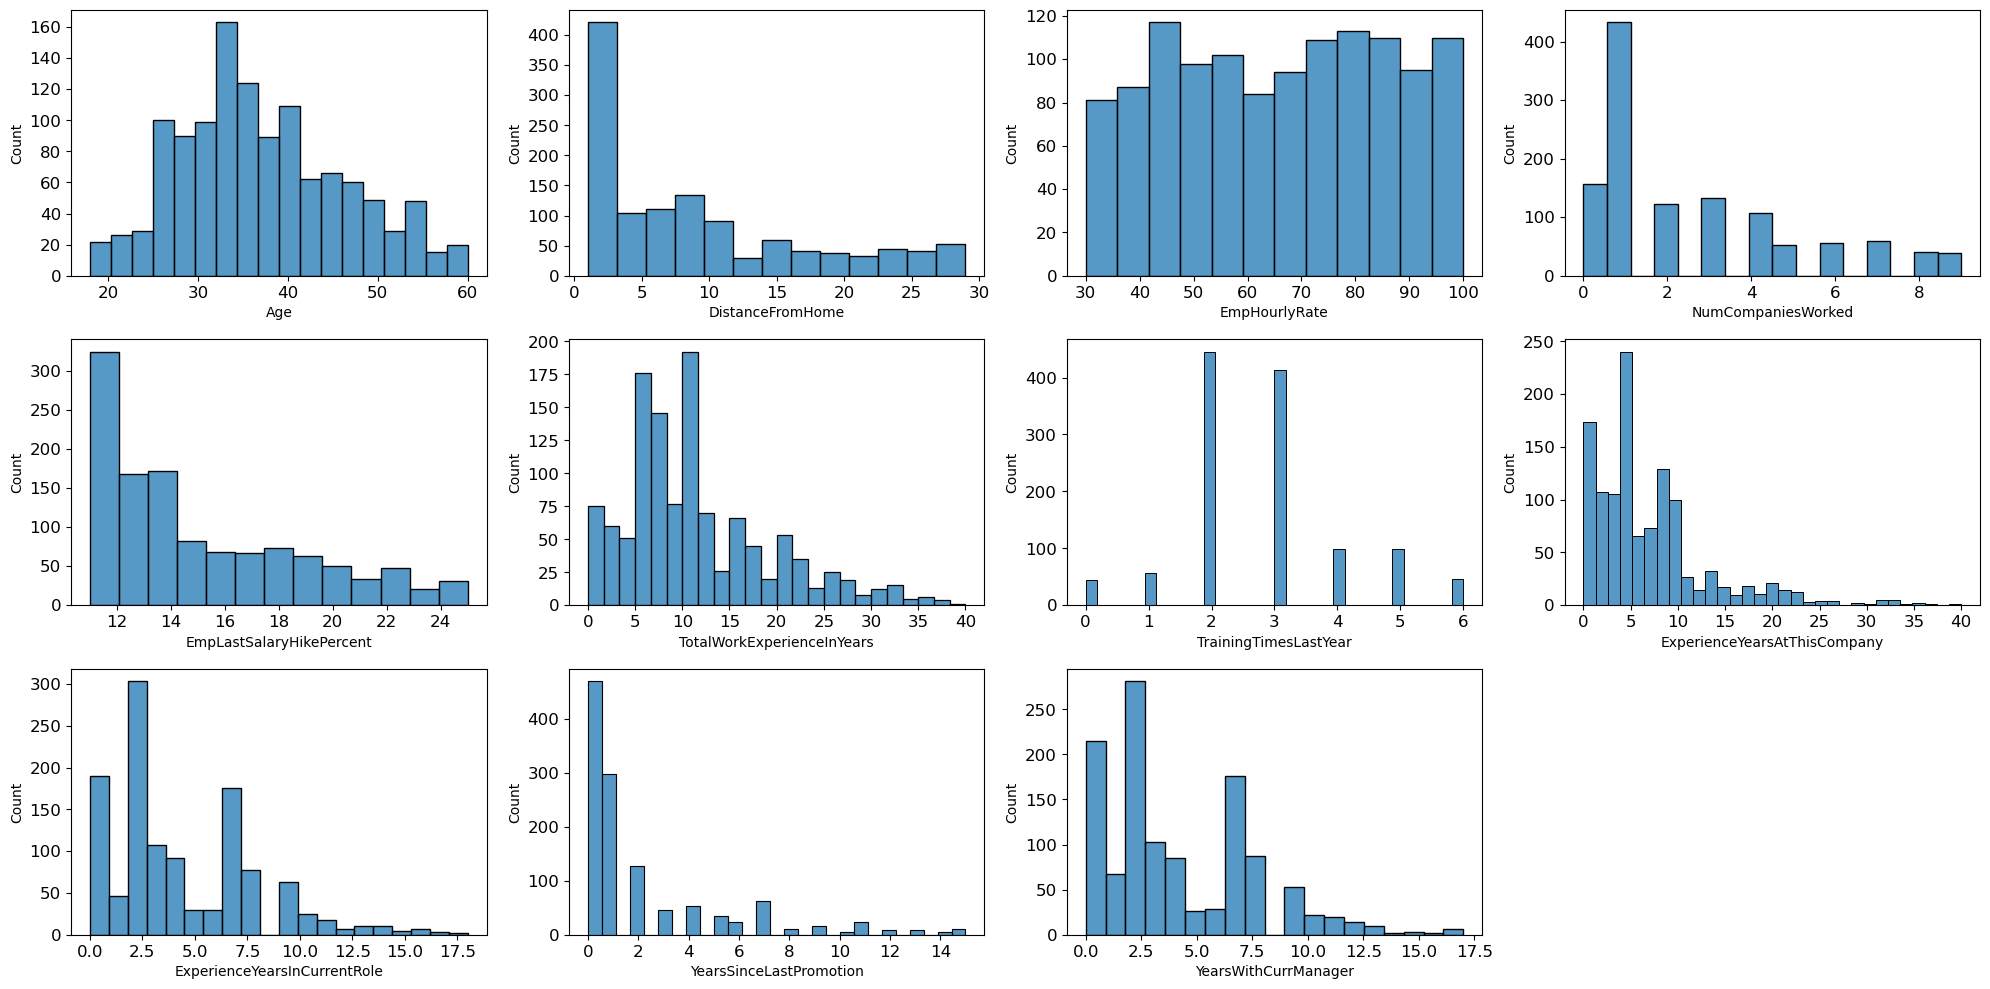

In [18]:
# Univariate Analysis for Numerical Data

plt.figure(figsize=(20,10))                # Set Canvas size
plotnumber = 1
for i in num_data.columns :            # iterate over all columns
    plt.subplot(3,4,plotnumber)           # set number of plots in row and columns
    sns.histplot(x = data[i])             # visualise through histogram
    plt.xticks(fontsize=12)               # set X ticks with size
    plt.yticks(fontsize=12)               # set y ticks with size
    plotnumber = plotnumber + 1
plt.tight_layout() # to avoid overlapping of images
plt.show() # for visualisation

#### **Insights from Numerical Univariate Analysis**

- Majority of employees at INX are in the age group of 25 to 40 years.  
- 35% of employees live within 3 km of the office, while 30% live more than 10 km away.  
- All employees have an hourly rate between 80 and 120.  
- 13% of employees have not worked at any company before (freshers), and 36% have worked at only one company, so they are also considered freshers.  
- 61% of employees received a salary hike of only 11% to 15% in their last revision.  
- 70% of employees received training 2 or 3 times in the last year.  
- Around 35% of employees have up to 5 years of total work experience, while 40% have between 10 to 15 years.  
- Only 10% of employees have more than 20 years of experience, indicating strong loyalty and dedication to the company.  
- About 60% of employees have up to 5 years of experience in their current role.  
- Only 5% of employees have not been promoted in over 10 years, while up to 80% were promoted within the last 2 years.  
- 40% of employees have been working under their current manager for the past 2 years.  


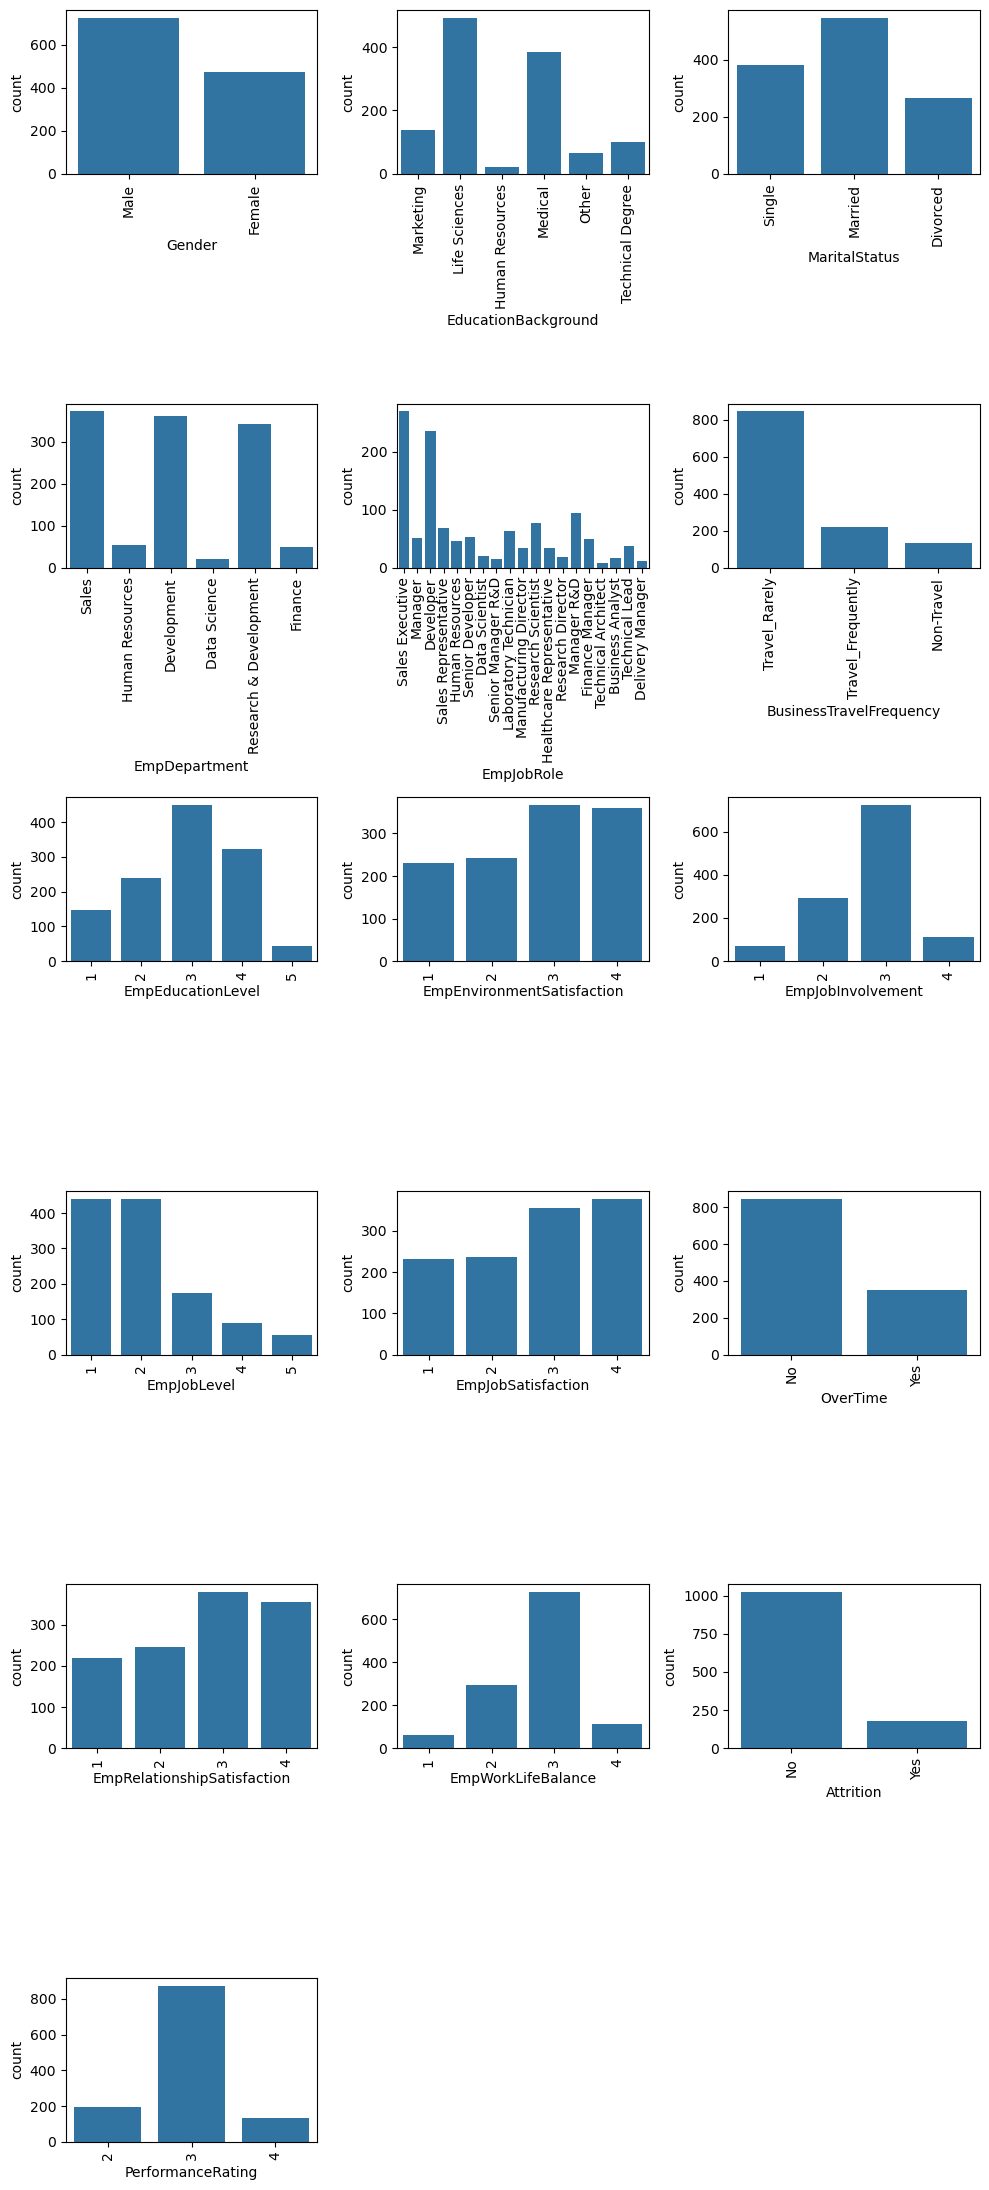

In [19]:
# Univariate Analysis for Categorical Data

plt.figure(figsize=(10,22))                                     # Set canvas size
plotnumber = 1
for i in cat_data.columns :                                     # iterate over categorical data
    plt.subplot(6,3,plotnumber)                                 # set plots in a row & column
    sns.countplot(x = data[i])                                  # plot count plot
    plt.xticks(rotation = 90,fontsize=10)                       # set x_ticks size with rotation
    plotnumber = plotnumber + 1
plt.tight_layout()                                              # avoid overlapping
plt.show() # for visualisation

#### **Insights from Categorical Univariate Analysis**

- **Gender**: 60% of employees are Male and 40% are Female.  
- **EducationBackground**: 41% have a Life Science background, followed by 32% in Medical.  
- **MaritalStatus**: 46% are Married, 32% are Single, and 22% are Divorced.  
- **EmpDepartment**: 31% work in Sales, 30% in Development, and 29% in the Research department.  
- **EmpJobRole**: 22% are Sales Executives and 20% are in Development roles.  
- **BusinessTravelFrequency**: 70% travel rarely, 18% travel frequently, and 12% do not travel.  
- **EmpEducationLevel**: 37% are at Level 3 and 27% at Level 4 education.  
- **EmpEnvironmentSatisfaction**: Over 60% have a satisfaction rating of 3 or 4 out of 5.  
- **EmpJobInvolvement**: 60% are moderately involved in their job, while only 9% are highly involved.  
- **EmpJobLevel**: About 75% of employees are at Job Level 1 or 2.  
- **EmpJobSatisfaction**: 40% are not satisfied with their job, while 60% are satisfied.  
- **OverTime**: Only 30% of employees work overtime; the remaining 70% do not.  
- **EmpRelationshipSatisfaction**: 40% are not satisfied with their relationships at work.  
- **EmpWorkLifeBalance**: Only 10% manage work-life balance well, 60% have a moderate balance, and 30% struggle.  
- **Attrition**: 85% of employees have not left the company, while 15% have (attrition).  
- **PerformanceRating**: Only 11% perform well, 73% are moderate, and 16% perform poorly.  


### **2. Bi-Variate Analysis**

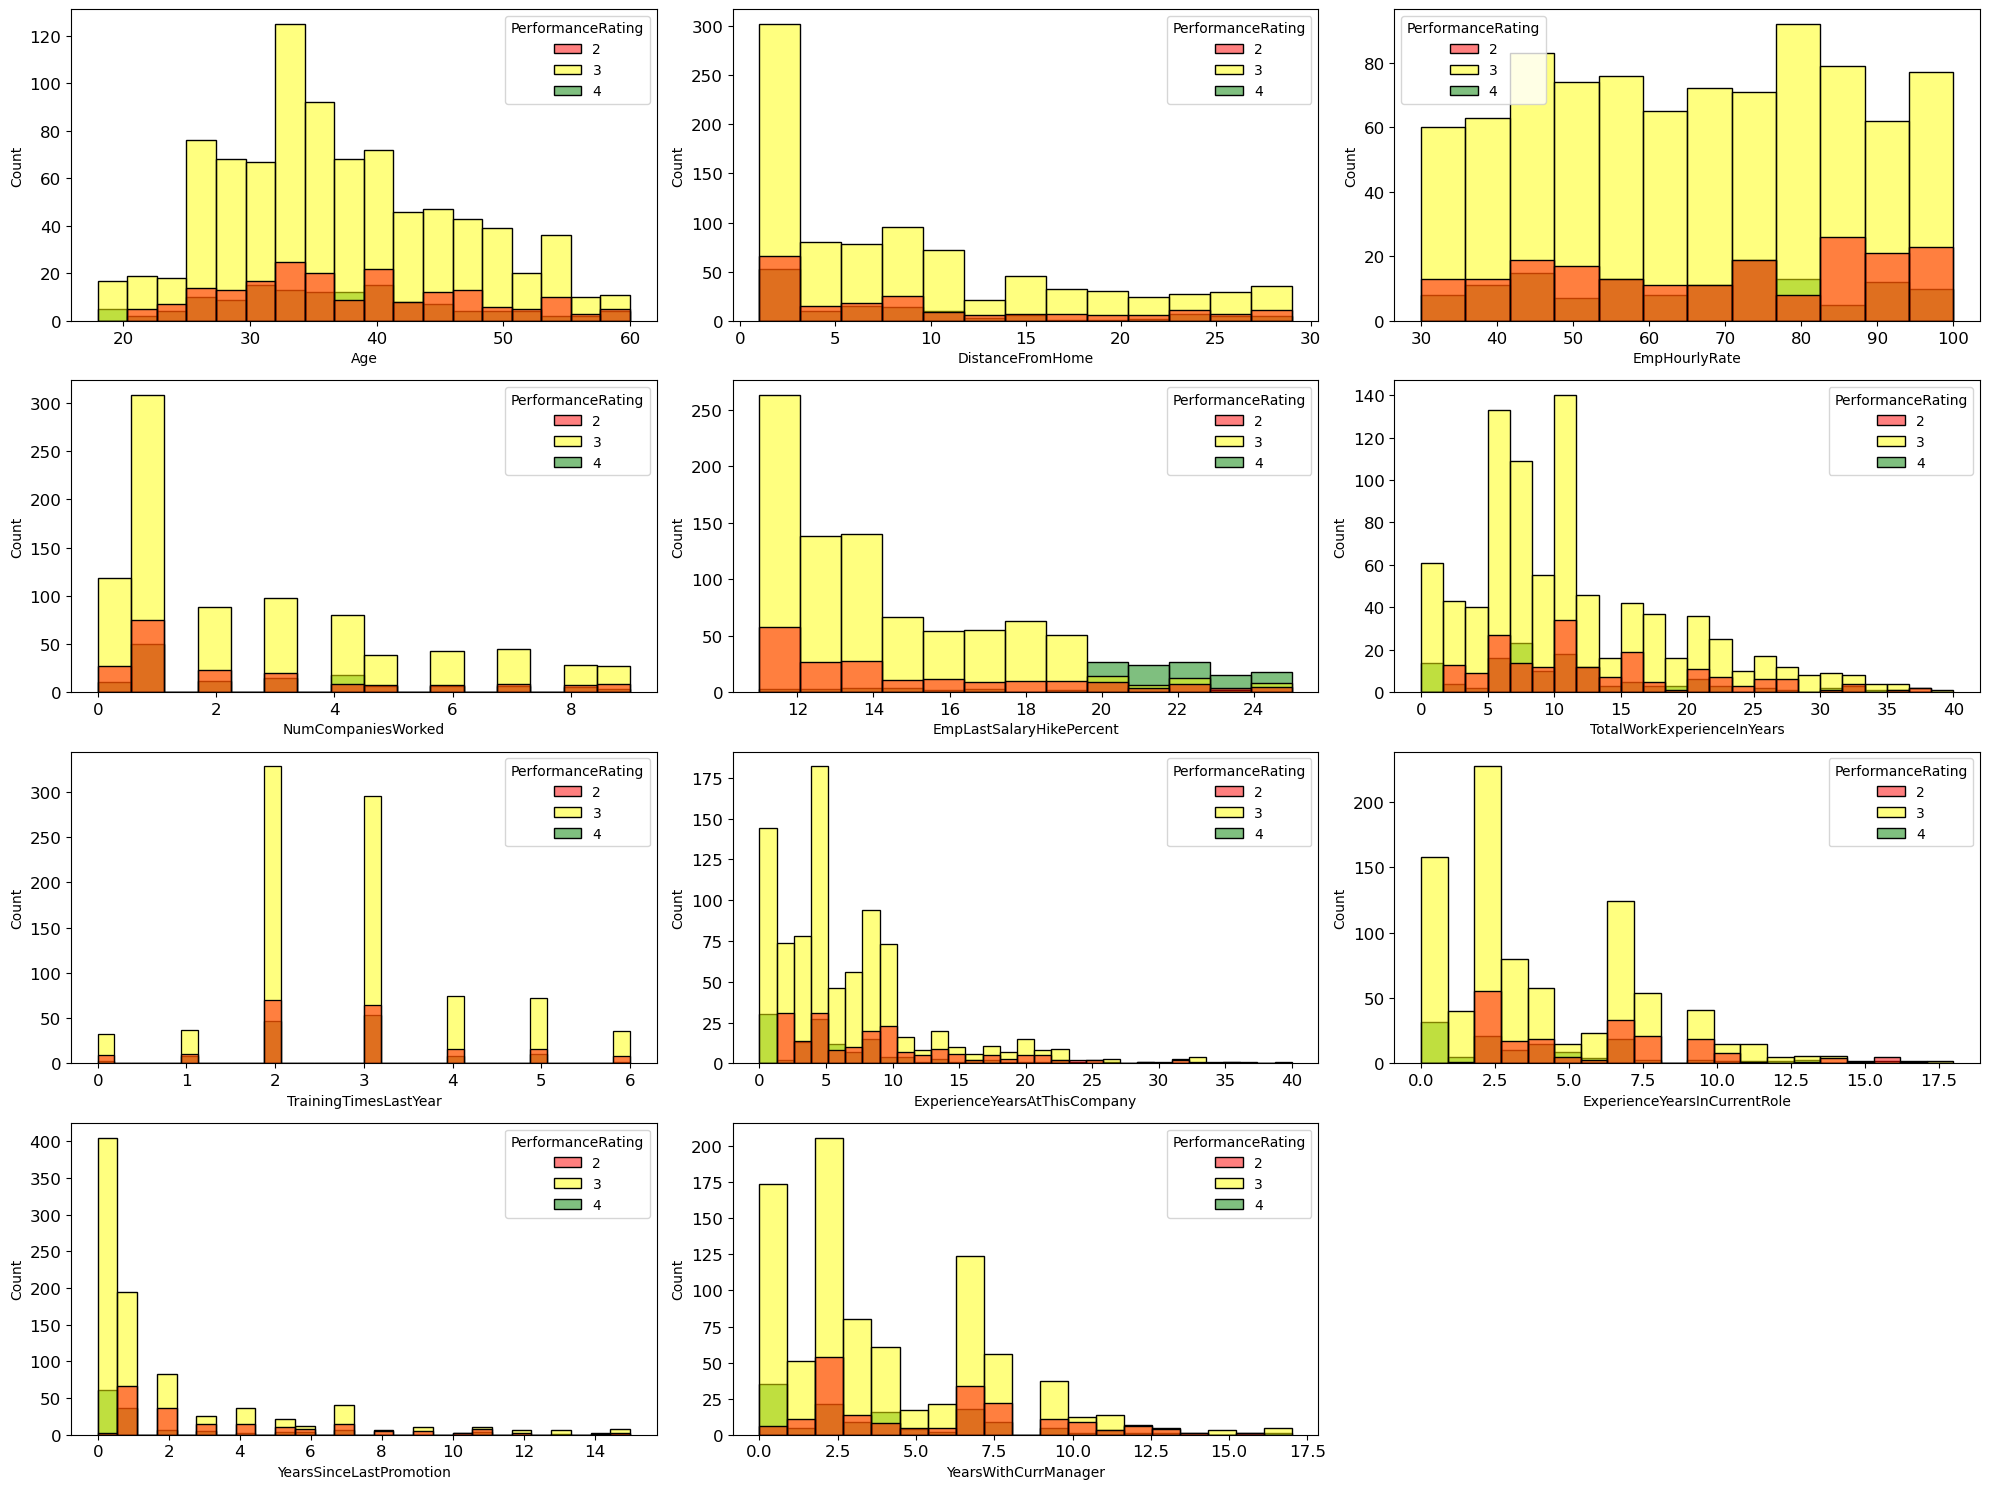

In [20]:
# Bi - Variate Analysis for Numerical Data

plt.figure(figsize=(20,15))         # set canvas size
plotnumber = 1                      # set plot number as 1
for i in num_data.columns :         # iterate through num_data
    plt.subplot(4,3,plotnumber)     # set no. of rows & columns
    sns.histplot(x = data[i],hue = data.PerformanceRating,palette=["red","yellow","green"])
    plt.xticks(fontsize=12)         # xticks sizze
    plt.yticks(fontsize=12)         # yticks size
    plotnumber = plotnumber + 1     # set to iterate all plots
plt.tight_layout()                  # avoid from overlapping
plt.show() # for visualisation

#### **Insights From Bivariate Analysis of Numerical Data**

- Employees aged between 25 and 45 tend to have poor performance.  
- Employees living less than 10 km from the office show poor performance.  
- Employees with an hourly rate above 85 tend to perform poorly.  
- Employees who have worked at only one company tend to have low performance.  
- Those with a salary hike below 14% perform poorly, while those with hikes greater than 20% perform very well.  
- Employees with 5 to 15 years of experience tend to have poor performance.  
- Employees trained 2 or 3 times last year tend to perform poorly.  
- Freshers or employees with 10 years at the company tend to have low performance.  
- Employees who have worked 2 years in the same role show poor performance.  
- Employees promoted within 4 years tend to have poor performance.  
- Employees who have worked either 2 years or more than 6.5 years under the same manager tend to perform poorly.  


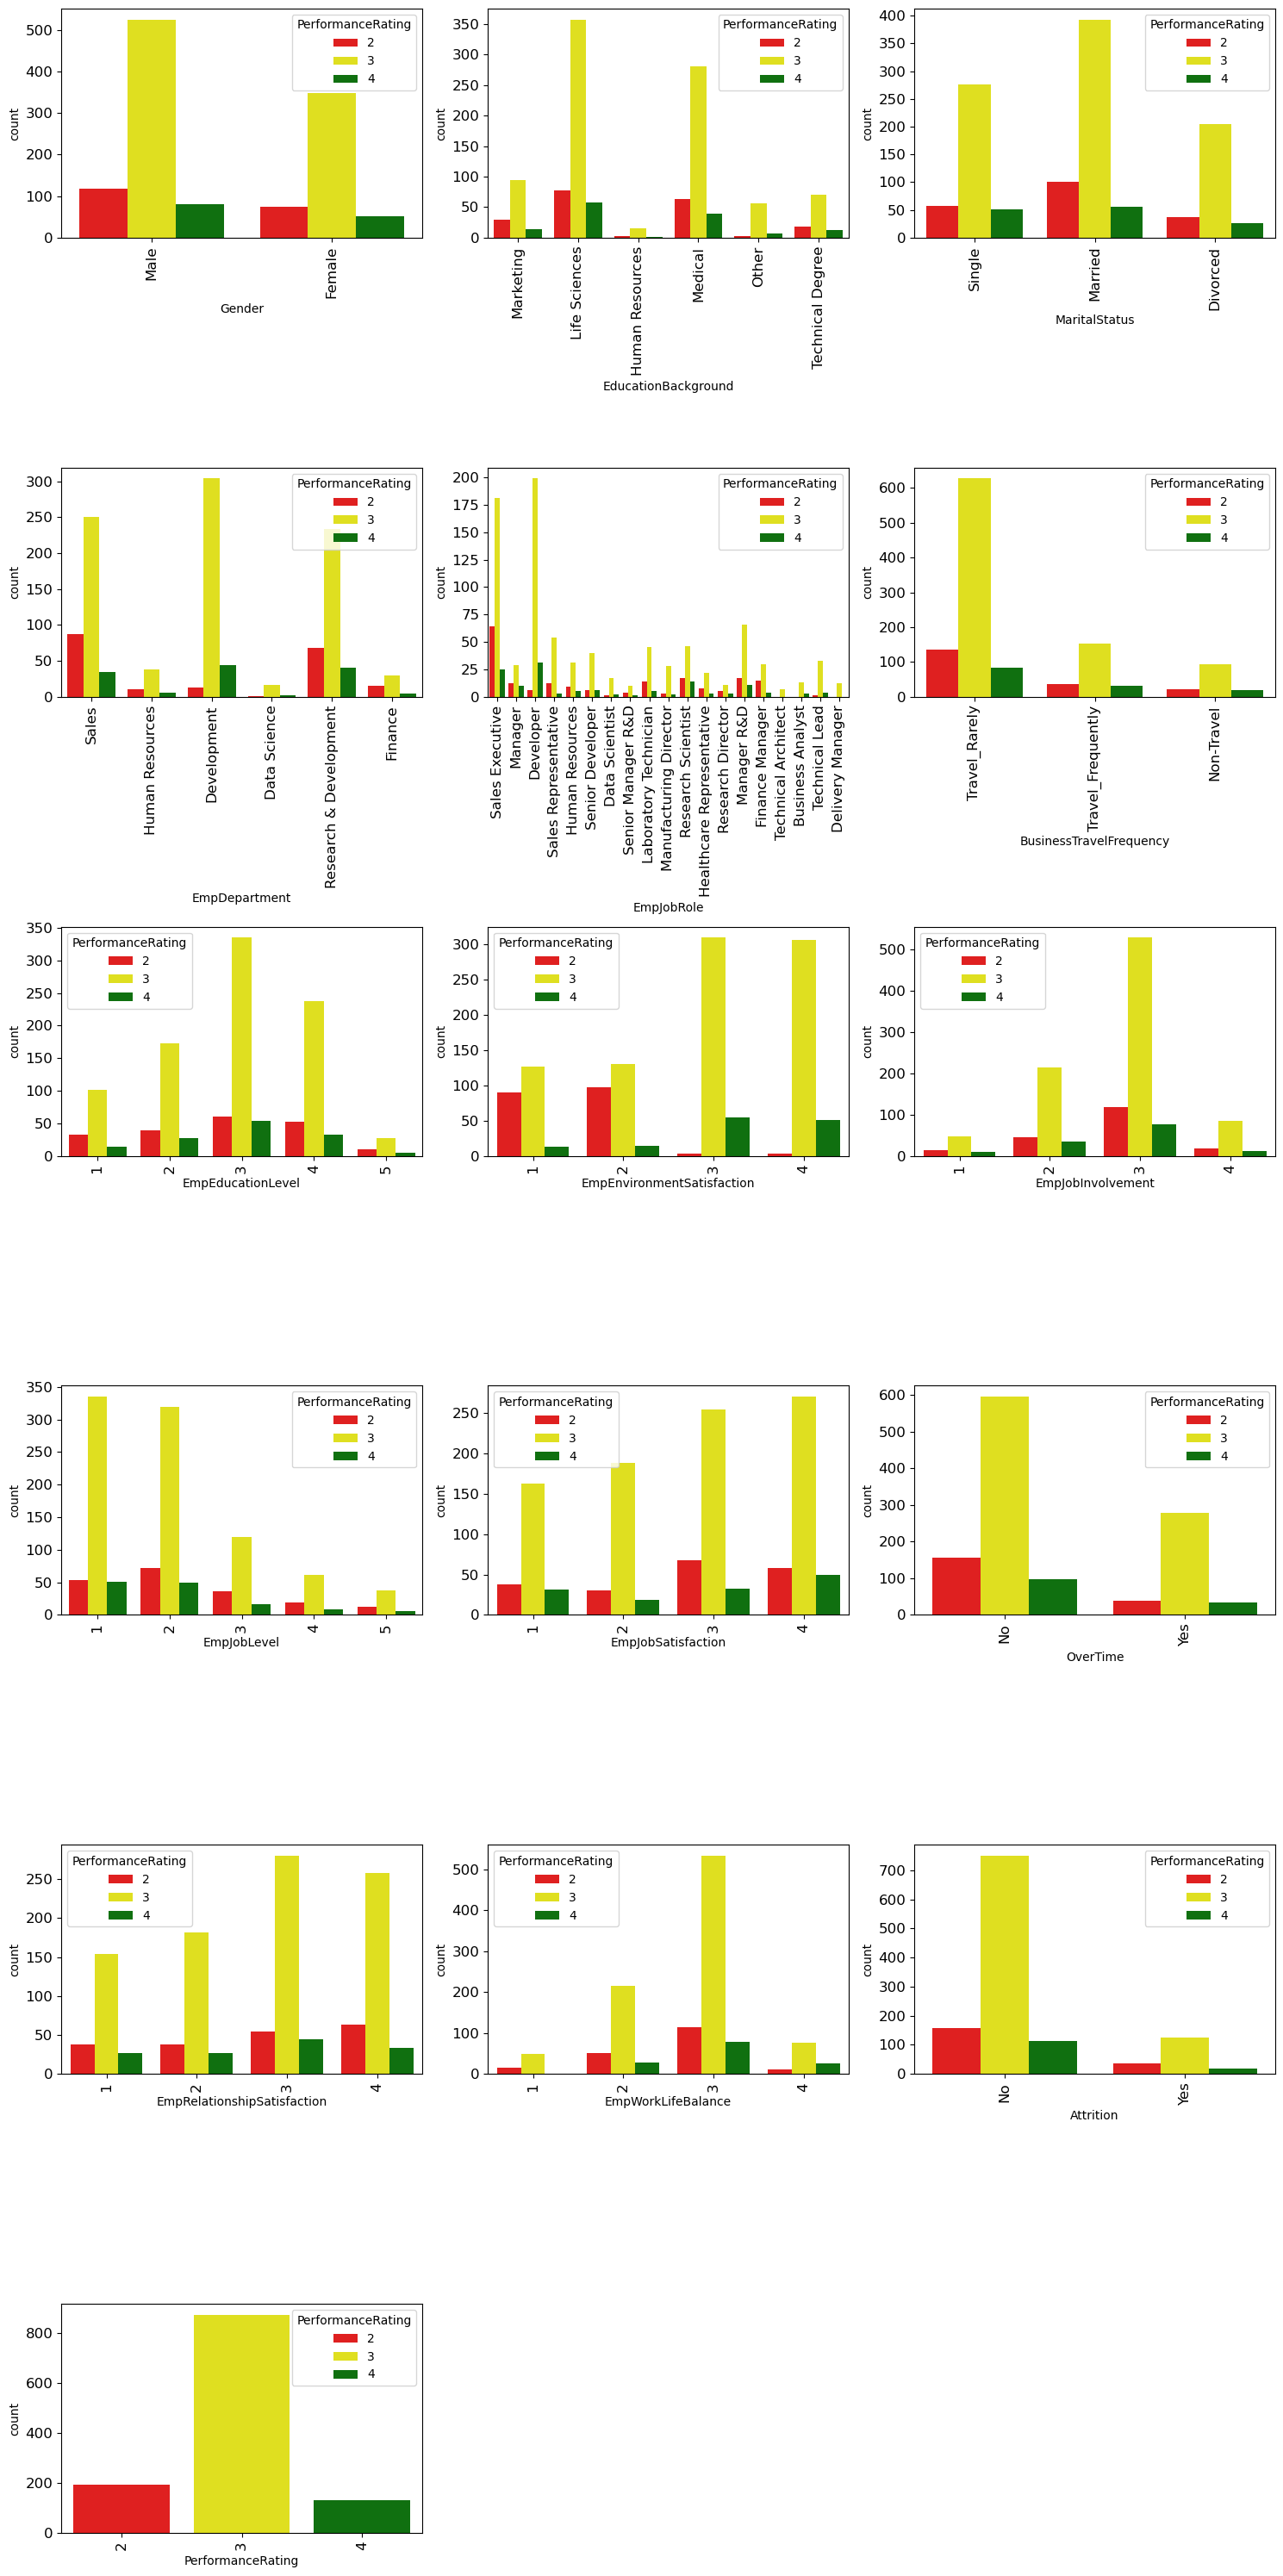

In [21]:
# Bi-Variate Analysis for Numerical Data

plt.figure(figsize=(15,30))                       # set canvas size
plotnumber = 1
for i in cat_data.columns :                       # iterate all categorical columns
    plt.subplot(6,3,plotnumber)                   # set rows and columns
    sns.countplot(x = data[i],hue = data.PerformanceRating,palette=["red","yellow","green"])
    plt.xticks(rotation = 90,fontsize=12)         # xticks size
    plt.yticks(fontsize=12)                       # yticks size
    plotnumber = plotnumber + 1
plt.tight_layout()                                # to avoid form overlapping
plt.show() # for visualisation

#### **Insights from Bivariate Analysis of Categorical Data**

- Male and female employees show similar performance levels.  
- Most employees in Life Science, Medicine, and Marketing fields tend to have poor performance.  
- Married employees generally perform poorly.  
- Employees in Sales and Research & Development departments tend to have lower performance.  
- Sales Executive employees show poor performance.  
- Employees who rarely travel tend to perform poorly.  
- Employees with education levels 3 and 4 tend to perform badly.  
- Employees dissatisfied with their job environment show poor performance.  
- Both low and high job involvement levels are associated with poor performance.  
- Employees at job level 5 tend to perform poorly.  
- Low relationship satisfaction correlates with poor performance.  
- Employees with poor work-life balance tend to perform worse.  
- Employees with attrition history generally show poor performance.  


### **Data Preprocessing**

### **1. Handling Missing Values**

In [22]:
print("Missing Values") # Giving a headline or  title to the records
data.isnull().sum()     # Checking missing values in our data and found none


Missing Values


Age                             0
Gender                          0
EducationBackground             0
MaritalStatus                   0
EmpDepartment                   0
EmpJobRole                      0
BusinessTravelFrequency         0
DistanceFromHome                0
EmpEducationLevel               0
EmpEnvironmentSatisfaction      0
EmpHourlyRate                   0
EmpJobInvolvement               0
EmpJobLevel                     0
EmpJobSatisfaction              0
NumCompaniesWorked              0
OverTime                        0
EmpLastSalaryHikePercent        0
EmpRelationshipSatisfaction     0
TotalWorkExperienceInYears      0
TrainingTimesLastYear           0
EmpWorkLifeBalance              0
ExperienceYearsAtThisCompany    0
ExperienceYearsInCurrentRole    0
YearsSinceLastPromotion         0
YearsWithCurrManager            0
Attrition                       0
PerformanceRating               0
dtype: int64

### **2. Handling Outliers**

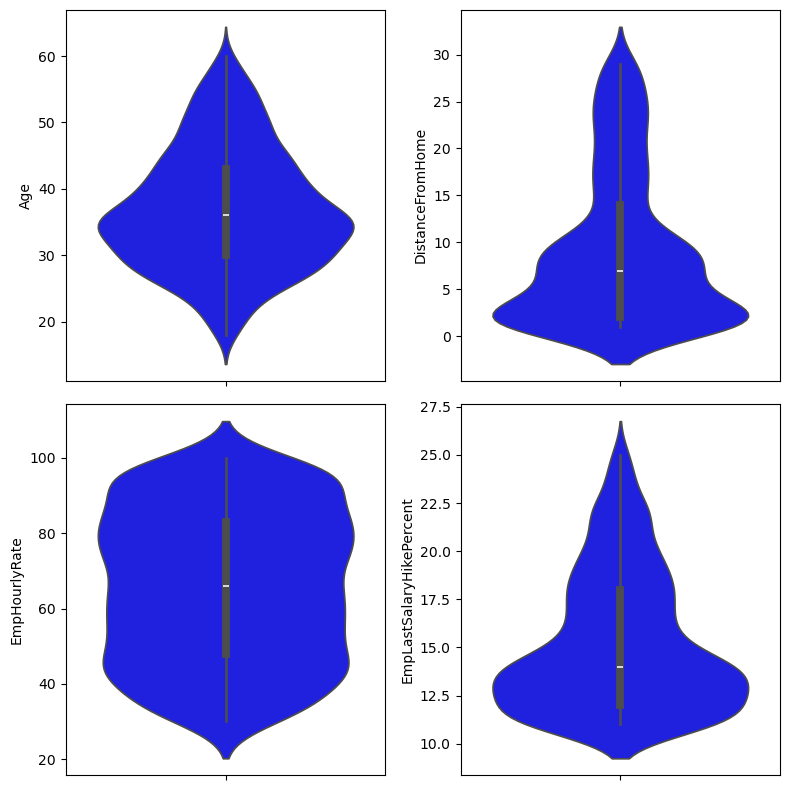

In [23]:
# checking outlier for continuous variable
plt.figure(figsize=(8,8))
plotnumber = 1
for i in ['Age', 'DistanceFromHome', 'EmpHourlyRate', 'EmpLastSalaryHikePercent'] :
    plt.subplot(2,2,plotnumber)
    sns.violinplot(data[i],color='b')
    plotnumber = plotnumber + 1
plt.tight_layout()
plt.show() # for visualisation

###  **2. Handle Categorical Data**

In [24]:
data.head()

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,32,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,10,3,4,55,3,2,4,1,No,12,4,10,2,2,10,7,0,8,No,3
1,47,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,14,4,4,42,3,2,1,2,No,12,4,20,2,3,7,7,1,7,No,3
2,40,Male,Life Sciences,Married,Sales,Sales Executive,Travel_Frequently,5,4,4,48,2,3,1,5,Yes,21,3,20,2,3,18,13,1,12,No,4
3,41,Male,Human Resources,Divorced,Human Resources,Manager,Travel_Rarely,10,4,2,73,2,5,4,3,No,15,2,23,2,2,21,6,12,6,No,3
4,60,Male,Marketing,Single,Sales,Sales Executive,Travel_Rarely,16,4,1,84,3,2,1,8,No,14,4,10,1,3,2,2,2,2,No,3


#### **Converting Categorical to Numerical Values**

                                         ________ Gender _________



In [25]:
data['Gender'].value_counts() #Checking value count of Gender

Gender
Male      725
Female    475
Name: count, dtype: int64

In [26]:
data['Gender'] = data['Gender'].map({'Male':1,'Female':0})

#changing the Gender's categorical values to numerical values using map function

                                        ________ EducationBackground _________

In [27]:
data['EducationBackground'].value_counts() #Checking value count of EducationBackground

EducationBackground
Life Sciences       492
Medical             384
Marketing           137
Technical Degree    100
Other                66
Human Resources      21
Name: count, dtype: int64

In [28]:
data['EducationBackground'] = data['EducationBackground'].map({"Human Resources":0 , "Other":1, "Technical Degree":2, "Marketing":3, "Medical":4, "Life Sciences":1, })

# #changing the EducationBackground categorical values to numerical values using map function

                                       ______ MaritalStatus ________

In [29]:
data["MaritalStatus"].value_counts() #Checking value count of MaritalStatus

MaritalStatus
Married     548
Single      384
Divorced    268
Name: count, dtype: int64

In [30]:
data["MaritalStatus"] = data["MaritalStatus"].map({"Single":0, "Married": 1, "Divorced":2})

# changing the MaritalStatus values to numerical values using map function

                                       _______ EmpDepartment ________

In [31]:
data["EmpDepartment"].value_counts() #Checking value count of EmpDepartment

EmpDepartment
Sales                     373
Development               361
Research & Development    343
Human Resources            54
Finance                    49
Data Science               20
Name: count, dtype: int64

In [32]:
data['EmpDepartment'].replace ({"Data Science":0, "Finance":1, "Human Resources":2, "Research & Development":3, "Development":4, "Sales":5}, inplace=True)

# changing the EmpDepartment categorical values to numerical values using replace function

                                       ____ EmpJobRole _____

In [33]:
data["EmpJobRole"].value_counts() #checking the value counts of EmpJobRole

EmpJobRole
Sales Executive              270
Developer                    236
Manager R&D                   94
Research Scientist            77
Sales Representative          69
Laboratory Technician         64
Senior Developer              52
Manager                       51
Finance Manager               49
Human Resources               45
Technical Lead                38
Manufacturing Director        33
Healthcare Representative     33
Data Scientist                20
Research Director             19
Business Analyst              16
Senior Manager R&D            15
Delivery Manager              12
Technical Architect            7
Name: count, dtype: int64

In [34]:
# EmpJobRole has nineteen unique values for which we can use Label Encoding

from sklearn.preprocessing import LabelEncoder  # Importing label encoding from sklearn preprocessing module for converting high unique values
Label_Encoder = LabelEncoder()                   # Creating an object of Label_Encoder

In [35]:
data['EmpJobRole'] = Label_Encoder.fit_transform(data['EmpJobRole'])

# Applying Label Encoding on EmpJobRole

                                  ______ BusinessTravelFrequency _____

In [36]:
data['BusinessTravelFrequency'].value_counts()  # checking value count of BusinessTravelFrequency

BusinessTravelFrequency
Travel_Rarely        846
Travel_Frequently    222
Non-Travel           132
Name: count, dtype: int64

In [37]:
data['BusinessTravelFrequency'] = data['BusinessTravelFrequency'].map({"Non-Travel":0 , "Travel_Frequently":1 , "Travel_Rarely":2})

# Converting values to numerical using map function

                                         ______ OverTime ______

In [38]:
data['OverTime'].value_counts() # checking value count of OverTime

OverTime
No     847
Yes    353
Name: count, dtype: int64

In [39]:
data['OverTime'].replace ({"No":0, "Yes":1}, inplace=True)

# Converting OverTime's Categorical values to Numerical using replace function

                                          _____ Attrition _____

In [40]:
data['Attrition'].value_counts()  # Checking value count of Attrition

Attrition
No     1022
Yes     178
Name: count, dtype: int64

In [41]:
data['Attrition'].replace({"No":0, "Yes":1}, inplace= True)

# changing Attrition's data type to numerical using replace function

                                      ______ PerformanceRating _______

In [42]:
# Checking value count of PerformanceRating
data['PerformanceRating'].value_counts()

PerformanceRating
3    874
2    194
4    132
Name: count, dtype: int64

In [43]:
data['PerformanceRating'].replace({2:0, 3:1, 4:2}, inplace= True)

# It is a multiclass classification so for accuracy we will convert the output to 0, 1 & 2 from 2, 3 & 4

### **Feature Selection**

In [44]:
data.head()

,Age,Gender,EducationBackground,MaritalStatus,EmpDepartment,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,EmpJobSatisfaction,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,TrainingTimesLastYear,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition,PerformanceRating
0,32,1,3,0,5,13,2,10,3,4,55,3,2,4,1,0,12,4,10,2,2,10,7,0,8,0,1
1,47,1,3,0,5,13,2,14,4,4,42,3,2,1,2,0,12,4,20,2,3,7,7,1,7,0,1
2,40,1,1,1,5,13,1,5,4,4,48,2,3,1,5,1,21,3,20,2,3,18,13,1,12,0,2
3,41,1,0,2,2,8,2,10,4,2,73,2,5,4,3,0,15,2,23,2,2,21,6,12,6,0,1
4,60,1,3,0,5,13,2,16,4,1,84,3,2,1,8,0,14,4,10,1,3,2,2,2,2,0,1


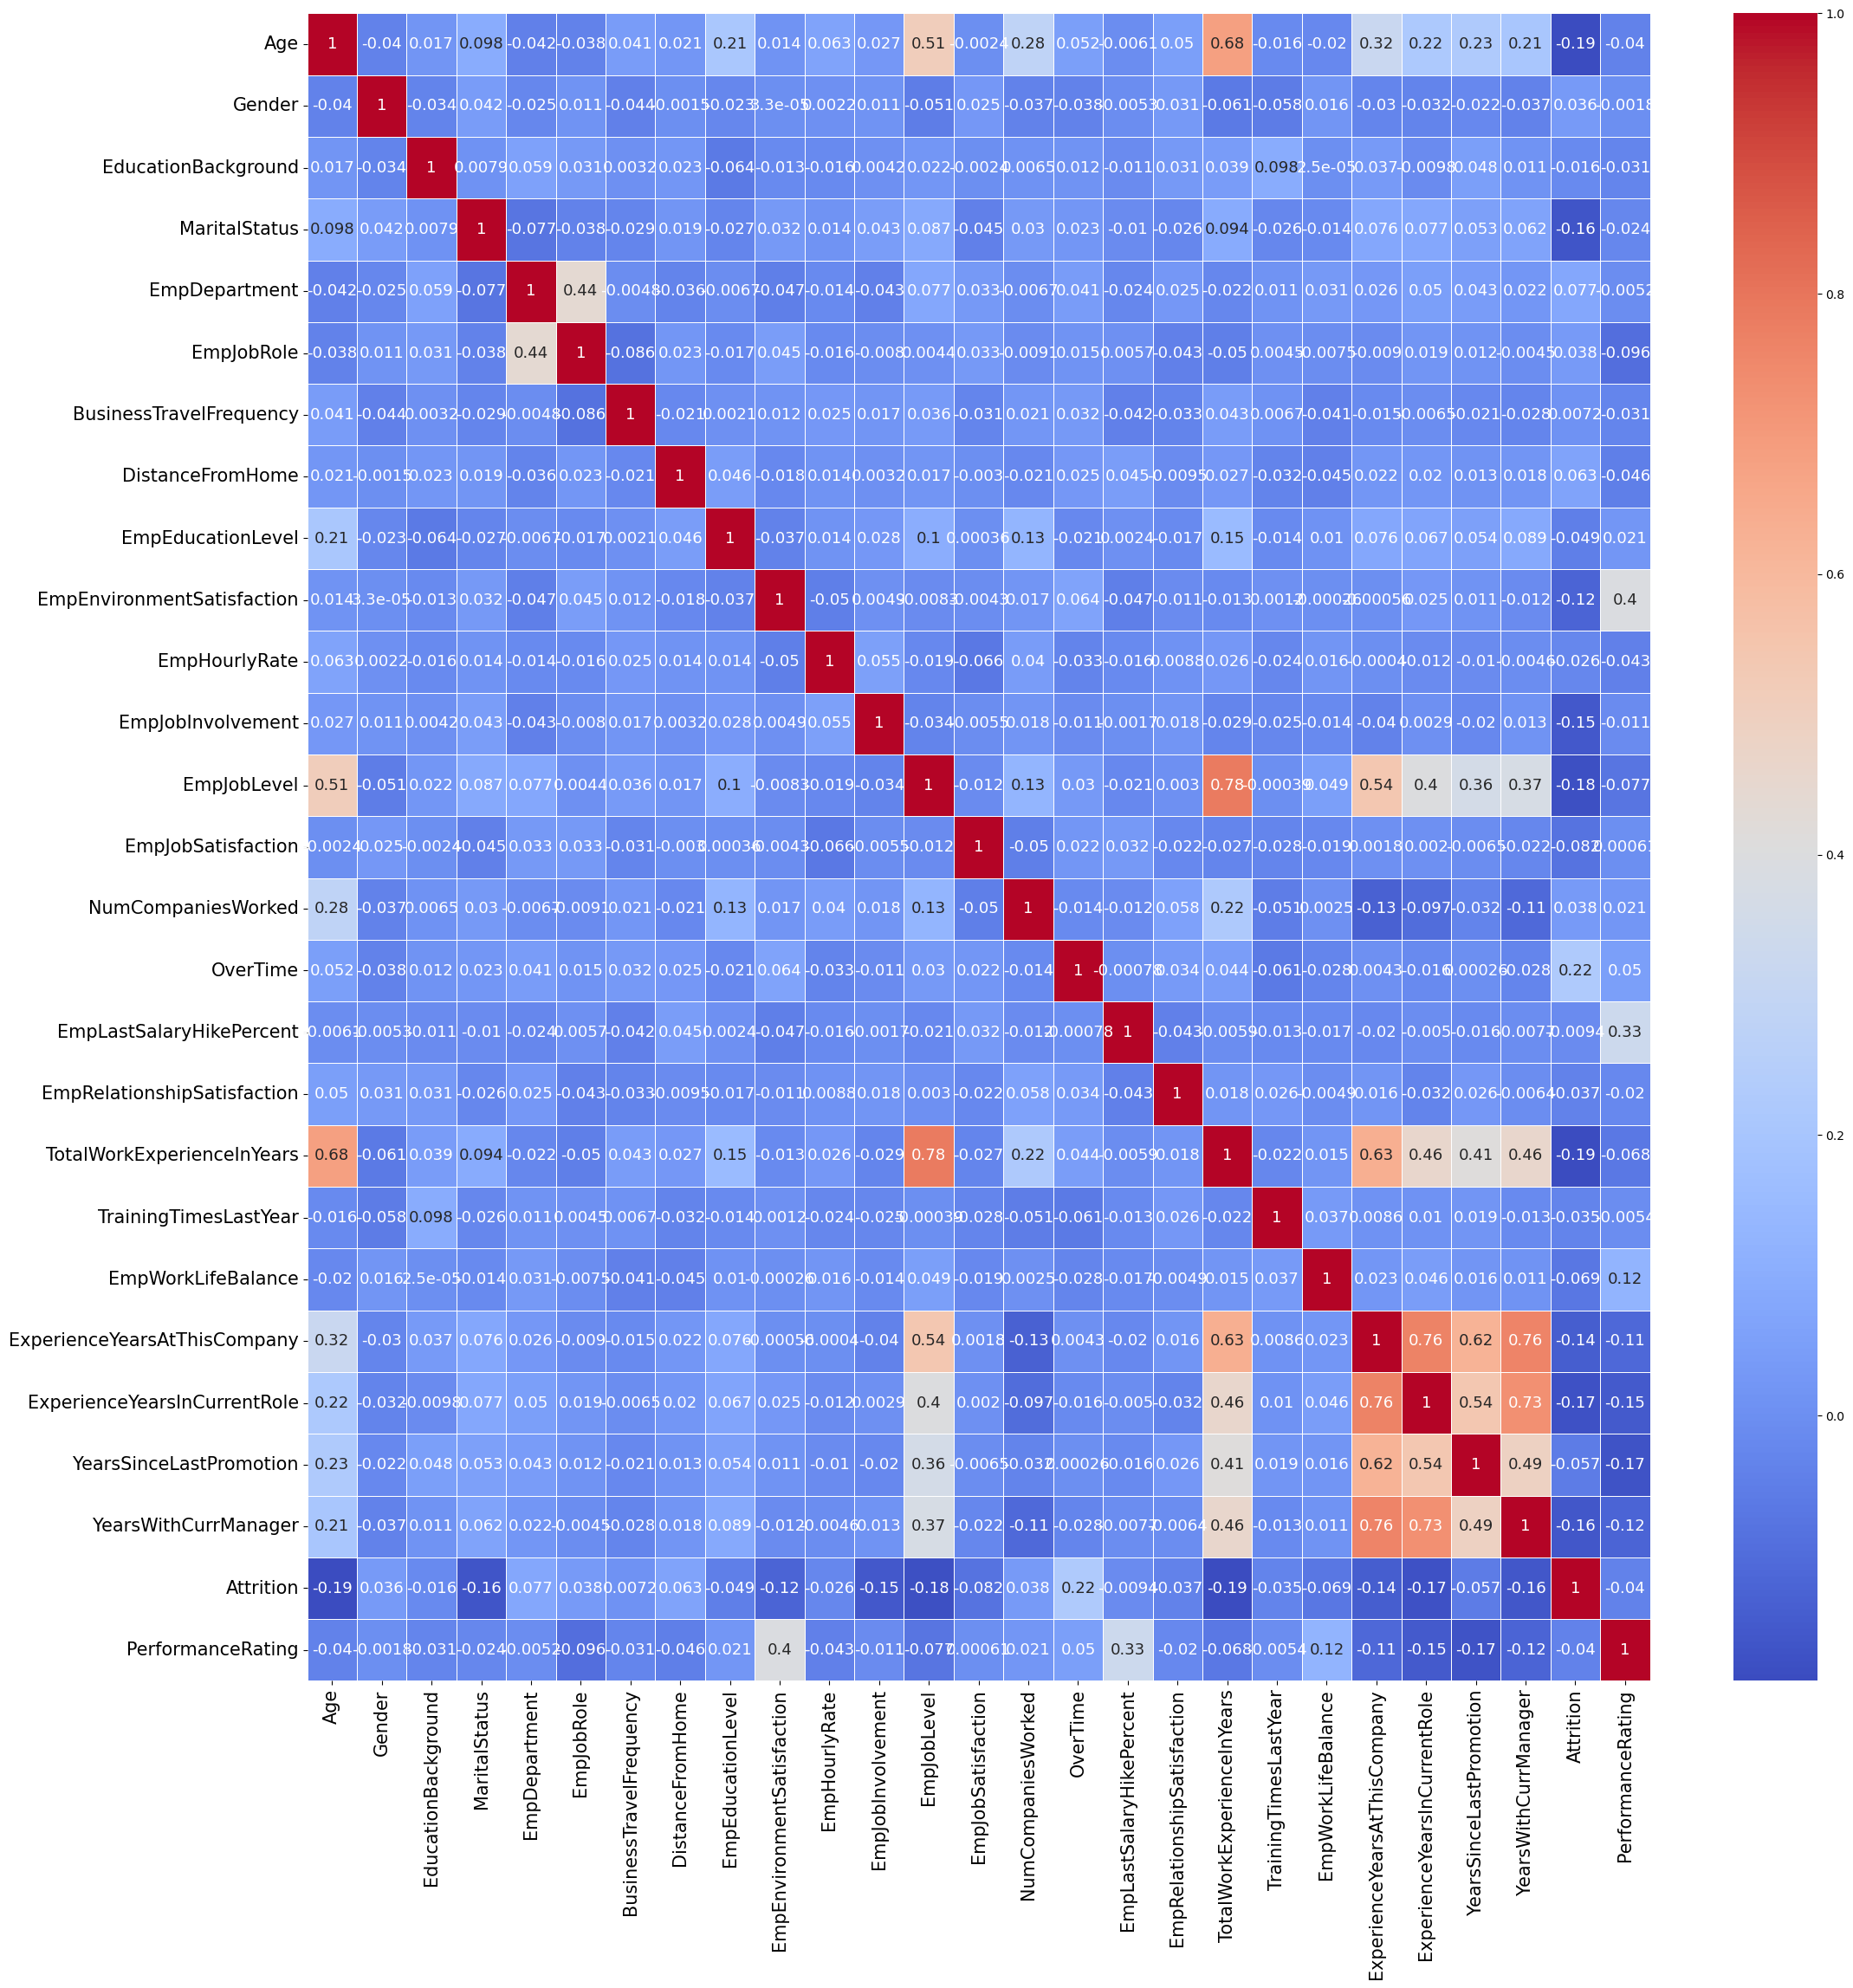

In [45]:
# We will check Correlation using Heatmap function of each features

plt.figure(figsize=(25,25))
sns.heatmap(data.corr(),annot=True,cmap='coolwarm', linewidths=0.65,annot_kws={"size": 13})
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

#### **Insights from Heatmap**

- **EmpLastSalaryHikePercent**: Strongest positive correlation (0.34); higher salary hikes are linked to higher performance.  

- **EmpEnvironmentSatisfaction**: Correlation around 0.4; better satisfaction leads to better performance.  

- **EmpWorkLifeBalance**: Positive correlation (0.12); better work-life balance correlates with better performance.  

- **Gender**, **EmpDepartment**, **EmpJobSatisfaction**, **TrainingTimesLastYear**: Very little to no correlation with performance (correlation coefficients close to 0).

**Analysis**

- EmpEnvironmentSatisfaction , EmpLastSalaryHikePercent & EmpWorkLifeBalance are the top three features that highly affect the Employees Performance Rating.

- Some independent features have no correlation with target class , so we will drop them..  

### **Model Creation**

In [46]:
# create an independent and dependent variable for model creation

X = data.drop(['Gender' , 'EmpDepartment' , 'EmpJobSatisfaction' , 'TrainingTimesLastYear' , 'PerformanceRating'], axis = 1)
y = data['PerformanceRating']

In [47]:
X.head() # checking data with dropped columns

,Age,EducationBackground,MaritalStatus,EmpJobRole,BusinessTravelFrequency,DistanceFromHome,EmpEducationLevel,EmpEnvironmentSatisfaction,EmpHourlyRate,EmpJobInvolvement,EmpJobLevel,NumCompaniesWorked,OverTime,EmpLastSalaryHikePercent,EmpRelationshipSatisfaction,TotalWorkExperienceInYears,EmpWorkLifeBalance,ExperienceYearsAtThisCompany,ExperienceYearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,32,3,0,13,2,10,3,4,55,3,2,1,0,12,4,10,2,10,7,0,8,0
1,47,3,0,13,2,14,4,4,42,3,2,2,0,12,4,20,3,7,7,1,7,0
2,40,1,1,13,1,5,4,4,48,2,3,5,1,21,3,20,3,18,13,1,12,0
3,41,0,2,8,2,10,4,2,73,2,5,3,0,15,2,23,2,21,6,12,6,0
4,60,3,0,13,2,16,4,1,84,3,2,8,0,14,4,10,3,2,2,2,2,0


In [48]:
y.head() # checking PerformanceRating data

0    1
1    1
2    2
3    1
4    1
Name: PerformanceRating, dtype: int64

---

### **Data Balancing**

- **Data Balancing** refers to the process of adjusting the class distribution in a dataset so that each class has a relatively equal number of samples.  
- When dealing with imbalanced datasets, where the rarity of one class can lead to biased model predictions and reduce overall model performance, techniques like SMOTE can be applied.  
- **SMOTE** (Synthetic Minority Over-sampling Technique) generates synthetic examples for the minority class based on the existing data, helping to balance the dataset.


In [49]:
# Checking value count of PerformanceRating
data['PerformanceRating'].value_counts()

PerformanceRating
1    874
0    194
2    132
Name: count, dtype: int64

**Analysis:** The target class is not equally distributed hence, we will use SMOTE for balancing the data

In [50]:
from imblearn.over_sampling import SMOTE     # Importing SMOTE from imblearn.over_sampling
smote = SMOTE()                              # Creating a variable of smote

X_smote, y_smote = smote.fit_resample(X,y)   # Applying the SMOTE technique on target variable

In [51]:
# importing counter to count each label

from collections import Counter
print("Before SMOTE Technique:", Counter(y))           # checking count of each class prior SMOTE
print("After SMOTE Technique:" , Counter(y_smote))     # checking count of each class after SMOTE

Before SMOTE Technique: Counter({1: 874, 0: 194, 2: 132})
After SMOTE Technique: Counter({1: 874, 2: 874, 0: 874})


In [52]:
# Splitting the data into Train & Test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_smote, y_smote, test_size=0.3, random_state=42)

## **Model Selection**

#### **1. Logistic Regression**

In [53]:
from sklearn.linear_model import LogisticRegression                # importing Logistic regression
logistic = LogisticRegression(multi_class ="ovr", random_state=1)  # creating object for multiclass

logistic.fit(X_train, y_train)                                     # training logistic regression and fitting the model
y_predict = logistic.predict(X_test)                               # We can make prediction using X_test

In [54]:
print("Predicted Values")
y_predict  # Predicted values

Predicted Values


array([1, 1, 0, 1, 1, 2, 0, 0, 2, 0, 1, 1, 1, 2, 0, 0, 1, 2, 0, 2, 2, 2,
       2, 0, 0, 1, 0, 2, 0, 0, 1, 2, 2, 2, 1, 2, 2, 2, 1, 0, 2, 1, 2, 0,
       0, 0, 0, 1, 2, 1, 0, 1, 0, 2, 1, 2, 1, 0, 2, 0, 0, 1, 2, 2, 0, 0,
       0, 2, 2, 0, 0, 2, 2, 2, 2, 1, 0, 0, 2, 0, 0, 1, 2, 1, 2, 1, 1, 2,
       0, 0, 1, 1, 1, 0, 2, 2, 1, 2, 0, 0, 1, 1, 1, 2, 0, 0, 0, 0, 1, 0,
       1, 2, 1, 0, 0, 0, 1, 0, 1, 1, 2, 2, 1, 1, 0, 1, 1, 0, 0, 2, 1, 1,
       0, 2, 2, 0, 2, 1, 0, 0, 0, 2, 1, 2, 0, 0, 0, 2, 0, 2, 2, 1, 2, 1,
       0, 2, 1, 1, 2, 0, 0, 2, 2, 1, 2, 0, 1, 2, 0, 1, 0, 1, 2, 2, 2, 1,
       0, 0, 1, 2, 1, 2, 2, 0, 0, 0, 2, 2, 0, 2, 1, 1, 0, 0, 0, 2, 0, 2,
       0, 0, 2, 1, 0, 0, 0, 2, 2, 0, 1, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 1,
       2, 1, 2, 2, 0, 1, 0, 2, 2, 1, 1, 0, 2, 2, 1, 2, 0, 2, 1, 1, 0, 1,
       0, 0, 1, 2, 1, 2, 2, 1, 0, 2, 2, 1, 1, 0, 1, 1, 2, 0, 1, 1, 0, 1,
       2, 0, 0, 0, 2, 0, 2, 1, 2, 1, 1, 0, 2, 0, 2, 0, 0, 2, 0, 0, 2, 0,
       2, 0, 0, 0, 2, 2, 2, 1, 2, 0, 2, 2, 1, 0, 2,

In [55]:
print("Actual Values")
y_test.values  # Actual values

Actual Values


array([1, 1, 0, 1, 2, 2, 0, 0, 2, 0, 1, 1, 1, 2, 0, 1, 1, 2, 2, 2, 1, 2,
       2, 0, 1, 1, 0, 1, 0, 0, 1, 2, 2, 2, 1, 0, 2, 2, 0, 0, 1, 1, 2, 0,
       0, 0, 0, 1, 2, 1, 0, 1, 0, 2, 0, 2, 1, 0, 2, 0, 0, 2, 2, 0, 0, 0,
       0, 2, 2, 0, 0, 1, 2, 2, 2, 0, 0, 1, 2, 0, 0, 0, 2, 1, 1, 2, 1, 2,
       0, 1, 1, 1, 1, 0, 2, 2, 0, 2, 0, 0, 1, 1, 1, 2, 0, 0, 0, 0, 0, 2,
       1, 2, 1, 0, 2, 1, 1, 0, 1, 1, 2, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       0, 2, 2, 0, 1, 1, 0, 0, 0, 2, 1, 1, 0, 0, 0, 2, 0, 2, 2, 0, 2, 1,
       0, 1, 0, 1, 0, 1, 0, 2, 2, 0, 2, 0, 1, 2, 0, 1, 0, 1, 2, 2, 2, 1,
       2, 0, 1, 2, 1, 2, 2, 0, 0, 0, 2, 1, 0, 2, 1, 1, 0, 0, 0, 2, 0, 2,
       1, 1, 2, 1, 0, 0, 0, 2, 2, 0, 1, 0, 2, 2, 2, 2, 0, 0, 2, 2, 2, 1,
       1, 1, 2, 2, 1, 1, 0, 2, 0, 1, 1, 0, 2, 1, 1, 2, 0, 2, 1, 1, 0, 1,
       0, 0, 0, 2, 1, 2, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 2, 0, 1, 1, 2, 1,
       2, 0, 0, 0, 2, 0, 2, 1, 2, 1, 1, 0, 2, 0, 1, 0, 0, 2, 0, 0, 2, 0,
       2, 0, 0, 0, 0, 2, 2, 1, 2, 0, 2, 1, 1, 0, 2,

In [63]:
from sklearn.metrics import accuracy_score, f1_score, confusion_matrix, classification_report, precision_score, recall_score

# Model Evaluation

In [64]:
# Calculate and print evaluation metrics

accuracy = accuracy_score(y_test, y_predict)
precision = precision_score(y_test, y_predict, average='weighted')
recall = recall_score(y_test, y_predict, average='weighted')
f1 = f1_score(y_test, y_predict, average='weighted')
conf_matrix = confusion_matrix(y_test, y_predict)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")
print("\nConfusion Matrix:")
display(conf_matrix)

Accuracy: 0.8348
Precision: 0.8353
Recall: 0.8348
F1-score: 0.8340

Confusion Matrix:


array([[236,  24,  18],
       [ 26, 190,  34],
       [ 13,  15, 231]])

**Interpretation of the Metrics:**

*   **Accuracy:** The proportion of correctly classified instances out of the total instances.
*   **Precision:** The ability of the model to return only relevant instances (true positives) out of the total predicted positives.
*   **Recall:** The ability of the model to find all the relevant instances (true positives) out of the total actual positives.
*   **F1-score:** The harmonic mean of precision and recall, providing a single score that balances both.
*   **Confusion Matrix:** A table that summarizes the performance of a classification model. It shows the counts of true positives, true negatives, false positives, and false negatives.

In [ ]:
print(classification_report(y_test,y_predict))

#### **Hyperparameter Tuning**
- Hyperparameter Tuning is the process of finding the optimal set of hyperparameters for a machine learning model to achieve the best performance on a given dataset.  
- During hyperparameter tuning, the model evaluates and calculates performance across all possible parameter combinations and identifies the set that yields the best results.  
- Grid Search and Random Search
 are two commonly used methods for hyperparameter tuning.


In [67]:
from sklearn.model_selection import GridSearchCV # import GridSearchCV to iterate through all parameters and make a model with all combinations

# creating dictionary -> key value pairs of hyperparameter having key as parameter and values as its values
Log_Hyperpara = {
    'C': [0.001, 0.01, 0.1, 1, 10, 100],                                        # Regularization strength values
    'solver': ['liblinear', 'lbfgs', 'saga'],                                   # Solver options
    'max_iter':[100,200,400,600,800,1000],                                      # maximum iteration
    'multi_class':['ovr','multinomial']                                         # how to perform multiclass classification
}


# Training data on gridsearch cv for finding best parameters
Log_grid = GridSearchCV(LogisticRegression(random_state=0),         # Estimator
                       param_grid=Log_Hyperpara,                    # param_grid----> hyperparametes(dictionary we created)
                       scoring='accuracy',                          # scoring---> performance matrix to check performance
                       cv=3,                                        # cv------> number of flods
                       verbose=3,                                   # verbose=Controls the verbosity: the higher, the more messages.
                       n_jobs=-1                                    # Number of jobs to run in parallel,-1 means using all processors.
                       )

# training data on gridsearch cv for finding best parameters
Log_grid.fit(X_train,y_train)

print(f"Best Score found: {Log_grid.best_score_})")         # printing  best score
print(f"Best paramters found: {Log_grid.best_params_})")    # printing  best parameters

Fitting 3 folds for each of 216 candidates, totalling 648 fits
Best Score found: 0.8326995282564744)
Best paramters found: {'C': 100, 'max_iter': 400, 'multi_class': 'ovr', 'solver': 'lbfgs'})


In [68]:
# Training the final model with the best hyperparameters on the full training data
log_reg_hyp = LogisticRegression(C= 0.1, max_iter =  500, multi_class = 'multinomial', solver = 'lbfgs')
log_reg_hyp.fit(X_train, y_train)


# Evaluating the final model on the test data
y_grid_pred = log_reg_hyp.predict(X_test)
accuracy_log = accuracy_score(y_test, y_grid_pred)
print("Accuracy of Logistic regression : ",accuracy_log)


Accuracy of Logistic regression :  0.8424396442185514


In [69]:
print(classification_report(y_test,y_grid_pred))

              precision    recall  f1-score   support

           0       0.86      0.86      0.86       278
           1       0.83      0.76      0.79       250
           2       0.84      0.90      0.87       259

    accuracy                           0.84       787
   macro avg       0.84      0.84      0.84       787
weighted avg       0.84      0.84      0.84       787



#### **2. K Nearest Neighbour**

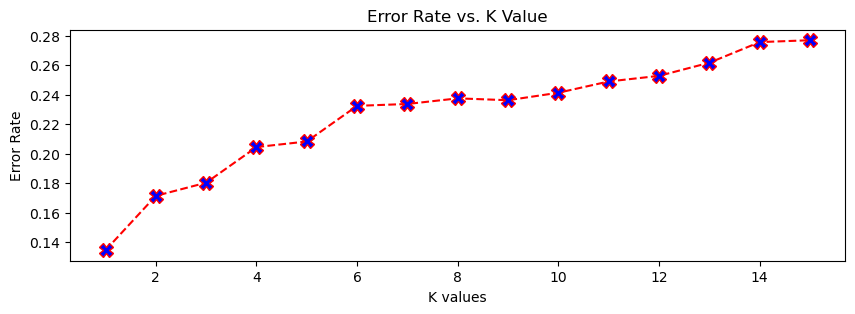

In [70]:
# Choosing an optimal K to determine how many nearest neighbors are required to create model

from sklearn.neighbors import KNeighborsClassifier               # importing KNeighborsClassifier
Error_rate = []                                                  # creating a list to store error for each K value
for K in range(1,16):                                            # using for loop to iterate from 1 to 16.
    model = KNeighborsClassifier(n_neighbors=K)                  # creating the model
    model.fit(X_train,y_train)                                   # training the model
    y_pred = model.predict(X_test)                               # predicting the X_test
    Error_rate.append(np.mean(y_pred != y_test))                 # appending the error in empty list


# plotting a graph between K values and Error Rate
plt.figure(figsize=(10,3))
plt.plot(range(1,16),Error_rate,linestyle='dashed',color='red',marker='X',markerfacecolor='blue',markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K values')
plt.ylabel('Error Rate')
plt.show()

In [71]:
knn = KNeighborsClassifier(n_neighbors=3)                  # defining the KNN model
knn.fit(X_train,y_train)                                   # training the KNN model
y_predict_knn = knn.predict(X_test)                             # making the prediction for test data
accuracy_knn = accuracy_score(y_predict_knn,y_test)                  # checking the performance of the model

F1_knn = f1_score(y_test,y_predict_knn,average='weighted')
print("F1_score of K neighbour : ",F1_knn)
print("Accuracy of K Nearest Neighbour : ",accuracy_knn)

F1_score of K neighbour :  0.80159380815664
Accuracy of K Nearest Neighbour :  0.8195679796696315


In [72]:
print("Classification Report")
print(classification_report(y_test,y_predict_knn))

Classification Report
              precision    recall  f1-score   support

           0       0.74      0.96      0.84       278
           1       0.95      0.48      0.64       250
           2       0.85      0.99      0.92       259

    accuracy                           0.82       787
   macro avg       0.85      0.81      0.80       787
weighted avg       0.85      0.82      0.80       787



**Hyperparameter Tuning for K nearest neighbour:**

In [73]:
# creating dictionary -> key value pair of hyperparameters having key as parameter and values as its values
Knn_Hyperpara = {
    'n_neighbors': range(1, 21),                       # Test k from 1 to 20 (you can adjust the range)
    'weights':['uniform','distance'],                  # Neighbor's contributions are weighted when making predictions.
    'metric': ['euclidean', 'manhattan', 'minkowski']  # Distance metrics to consider
}

# Perform grid search by defining all parameters
Knn_grid_search = GridSearchCV(estimator=KNeighborsClassifier(), # Model
                               param_grid=Knn_Hyperpara,         # Hyperparametes (from the dictionary that we had created)
                               cv=3,                             # Number of folds
                               scoring='accuracy',               # Performance matrix to check performance
                               verbose=3)

# training grid to find best parameters
Knn_grid_search.fit(X_train,y_train)

Fitting 3 folds for each of 120 candidates, totalling 360 fits
[CV 1/3] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.856 total time=   0.2s
[CV 2/3] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.845 total time=   0.0s
[CV 3/3] END metric=euclidean, n_neighbors=1, weights=uniform;, score=0.827 total time=   0.0s
[CV 1/3] END metric=euclidean, n_neighbors=1, weights=distance;, score=0.856 total time=   0.0s
[CV 2/3] END metric=euclidean, n_neighbors=1, weights=distance;, score=0.845 total time=   0.0s
[CV 3/3] END metric=euclidean, n_neighbors=1, weights=distance;, score=0.827 total time=   0.0s
[CV 1/3] END metric=euclidean, n_neighbors=2, weights=uniform;, score=0.779 total time=   0.0s
[CV 2/3] END metric=euclidean, n_neighbors=2, weights=uniform;, score=0.784 total time=   0.0s
[CV 3/3] END metric=euclidean, n_neighbors=2, weights=uniform;, score=0.776 total time=   0.0s
[CV 1/3] END metric=euclidean, n_neighbors=2, weights=distance;, score=0.855 to

GridSearchCV(cv=3, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhattan', 'minkowski'],
                         'n_neighbors': range(1, 21),
                         'weights': ['uniform', 'distance']},
             scoring='accuracy', verbose=3)

In [74]:
print("Best Hyperparameters :", Knn_grid_search.best_params_)
print("Best Accuracy :", Knn_grid_search.best_score_)

# printing best scores and parameters

Best Hyperparameters : {'metric': 'manhattan', 'n_neighbors': 1, 'weights': 'uniform'}
Best Accuracy : 0.8544913691972517


In [76]:
# Defining the KNN model & training with the best parameters

knn_hyp = KNeighborsClassifier(n_neighbors=2,metric='manhattan',weights='distance')
knn_hyp.fit(X_train,y_train)                                    # Training the KNN model
y_hyp_knn = knn_hyp.predict(X_test)                             # Making the prediction for test data
acc_hyp_knn = accuracy_score(y_hyp_knn,y_test)                  # Checking the performance

print("Accuracy of K nearest Neighbour : ",acc_hyp_knn)
print("Classification Report")
print(classification_report(y_test,y_hyp_knn))

Accuracy of K nearest Neighbour :  0.8589580686149937
Classification Report
              precision    recall  f1-score   support

           0       0.79      0.99      0.88       278
           1       0.98      0.58      0.73       250
           2       0.88      0.99      0.93       259

    accuracy                           0.86       787
   macro avg       0.88      0.85      0.85       787
weighted avg       0.88      0.86      0.85       787



#### **3. Support Vector Classifier**

In [83]:
from sklearn.svm import SVC                               # importing SVC classifier
svc = SVC(decision_function_shape='ovr',random_state=1)   # defining SVC for multiclass
svc.fit(X_train,y_train)                                  # Training the SVC model
y_pr_svc = svc.predict(X_test)                            # Prediction through SVC


acc_svc = accuracy_score(y_test,y_pr_svc)                 # Testing accuracy performance of the SVC Model
print("Accuracy of SVC : ",acc_svc)

f1_svc = f1_score(y_test,y_pr_svc,average='weighted')     # Testing F1 score performance
print("f1_score of Support Vector : ",f1_svc)

Accuracy of SVC :  0.7217280813214739
f1_score of Support Vector :  0.7157098740083783


In [84]:
# classification report of Support Vector
print(classification_report(y_test,y_pr_svc))

              precision    recall  f1-score   support

           0       0.73      0.69      0.71       278
           1       0.66      0.56      0.61       250
           2       0.76      0.91      0.83       259

    accuracy                           0.72       787
   macro avg       0.72      0.72      0.71       787
weighted avg       0.72      0.72      0.72       787



**Hyperparameter Tuning of Support Vector Classifier:**

In [85]:
# Defining a grid of hyperparameters with values to search
Svc_Hyperpara = {
    'C': [0.0001, 0.001, 0.1, 1, 10, 100],              # Regularization parameter
    'kernel': ['linear', 'rbf', 'poly'],                # Kernel functions to consider
    'gamma': [0.1, 1, 'scale', 'auto'],                 # Kernel coefficient for rbf and poly kernels
}


# Perform grid search with cross-validation
Svc_grid_search = GridSearchCV(estimator=SVC(),               # estimator or model
                               param_grid=Svc_Hyperpara,      # hyperparametes(dictionary we created)
                               cv=3,                          # number of folds
                               scoring='accuracy',            # performance matrix to check performance
                              verbose=3,
                              n_jobs=-1)

# Train grid to find best models
Svc_grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 72 candidates, totalling 216 fits


GridSearchCV(cv=3, estimator=SVC(), n_jobs=-1,
             param_grid={'C': [0.0001, 0.001, 0.1, 1, 10, 100],
                         'gamma': [0.1, 1, 'scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy', verbose=3)

In [87]:
print("Best Score : ",Svc_grid_search.best_score_)
print("Best Parameters : ",Svc_grid_search.best_params_)

# printing the best score and parameters

Best Score :  0.8768385695794958
Best Parameters :  {'C': 10, 'gamma': 'auto', 'kernel': 'rbf'}


In [88]:
# Training Support Vector with Best parameters
from sklearn.svm import SVC
svc_hyp = SVC(C=10,gamma='auto',kernel='rbf',decision_function_shape='ovr')
svc_hyp.fit(X_train,y_train)
y_hyp_svc = svc_hyp.predict(X_test)


# checking performance of the SVC model
acc_hyp_svc = accuracy_score(y_test,y_hyp_svc)
print("Accuracy of SVC : ",acc_hyp_svc)

# printing the classification report
print(classification_report(y_test,y_hyp_svc))

Accuracy of SVC :  0.9224904701397713
              precision    recall  f1-score   support

           0       1.00      0.87      0.93       278
           1       0.81      0.99      0.89       250
           2       1.00      0.91      0.95       259

    accuracy                           0.92       787
   macro avg       0.93      0.92      0.92       787
weighted avg       0.94      0.92      0.92       787



#### **4. Decision Trees** 

In [89]:
from sklearn.tree import DecisionTreeClassifier          # importing Decision Tree
tree = DecisionTreeClassifier(random_state=2)            # creating object of Decision Tree
tree.fit(X_train,y_train)                                # Training the Decision Tree
y_pr_tree = tree.predict(X_test)                         # Making the prediction

In [90]:
# Metrics Scores

print(confusion_matrix(y_test,y_pr_tree))            # confusion matrix

acc_tree = accuracy_score(y_test,y_pr_tree)          #checking accuracy score
print("Accuracy Score of Decision Tree : ",acc_tree) # printing accuracy

f1_tree = f1_score(y_test , y_pr_tree , average='weighted') #Testing f1-score
print("f1_score of Decision Tree : " , f1_tree)

[[265  10   3]
 [ 14 206  30]
 [  0  14 245]]
Accuracy Score of Decision Tree :  0.9097839898348158
f1_score of Decision Tree :  0.9090712089620278


In [91]:
# classification report
print(classification_report(y_test,y_pr_tree))

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       278
           1       0.90      0.82      0.86       250
           2       0.88      0.95      0.91       259

    accuracy                           0.91       787
   macro avg       0.91      0.91      0.91       787
weighted avg       0.91      0.91      0.91       787



**Hyperparameter Tuning For Decision Tree Classifier**


In [92]:
# creating dictionary -> key value pair of hyperparameters having key as parameter and values as its values

Tree_Hyperpara ={
    'criterion': ['gini', 'entropy'],                # Spliting the criterion
    'max_depth': [None,range(1, 20)],                # Maximum depth of the tree
    'splitter': ['best', 'random'],                  # Strategy for choosing the split at each node
    'max_features': ['auto', 'sqrt', 'log2', None],  # Number of features to consider at each split
    'min_samples_split': [2, 5, 10],                 # Minimum samples required to split a node
    'min_samples_leaf': list(range(1, 11))           # Minimum samples required at a leaf node
}


# Perform grid search with cross-validation
Tree_grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=2),
                               param_grid=Tree_Hyperpara,      # hyperparametes(dictionary we created)
                               cv=3,                           # no of folds
                               scoring='accuracy',             # performance matrix to check performance
                               n_jobs=-1,
                               verbose=1)

#training data on gridsearch cv
Tree_grid_search.fit(X_train,y_train)

# print best score and parameters
print("Best Accuracy:", Tree_grid_search.best_score_)
print("Best Hyperparameters:", Tree_grid_search.best_params_)

Fitting 3 folds for each of 960 candidates, totalling 2880 fits
Best Accuracy: 0.895368676657788
Best Hyperparameters: {'criterion': 'entropy', 'max_depth': None, 'max_features': None, 'min_samples_leaf': 2, 'min_samples_split': 2, 'splitter': 'best'}


In [93]:
# Training the Decission Tree with Best parameters
tree_hyp = DecisionTreeClassifier(criterion='entropy',max_depth=None,max_features=None,
                                  min_samples_leaf=3,min_samples_split=10,splitter='best',random_state=23)
tree_hyp.fit(X_train,y_train)
y_hyp_tree = tree_hyp.predict(X_test)

# checking performance of Decision Tree model
acc_hyp_tree = accuracy_score(y_test,y_hyp_tree)
print("Accuracy of Decision Tree after Hyperparameter : ",acc_hyp_tree)

# classification Report
print(classification_report(y_test,y_hyp_tree))

Accuracy of Decision Tree after Hyperparameter :  0.9250317662007624
              precision    recall  f1-score   support

           0       0.95      0.96      0.95       278
           1       0.92      0.87      0.89       250
           2       0.91      0.95      0.93       259

    accuracy                           0.93       787
   macro avg       0.92      0.92      0.92       787
weighted avg       0.93      0.93      0.92       787



#### **5. Random Forest**

In [94]:
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier    # importing random forest classifier
forest = RandomForestClassifier(random_state=1)        # creating a variable
forest.fit(X_train,y_train)                            # training random forest
y_pr_forest = forest.predict(X_test)                   # making the prediction

In [95]:
# Performance Metrics

#accuracy scores
acc_forest = accuracy_score(y_test,y_pr_forest)
print("Accuracy of Random Forest :  ",acc_forest)

#f1 scores
f1_forest = f1_score(y_test , y_pr_forest , average='weighted')
print("f1_score of  : " , f1_forest)

Accuracy of Random Forest :   0.9682337992376112
f1_score of  :  0.9682398217961953


In [97]:
# classification report
print(classification_report(y_test,y_pr_forest))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97       278
           1       0.95      0.95      0.95       250
           2       0.98      0.98      0.98       259

    accuracy                           0.97       787
   macro avg       0.97      0.97      0.97       787
weighted avg       0.97      0.97      0.97       787



**Hyperparameter Tuning of Random Forest**

In [98]:
# create a dictionary of hyperparameters with values
Forest_Hyperparameter = {
    'n_estimators': [50, 100, 200,300,400,500],        # Number of trees in the forest
    'max_depth': [None, range(1,20)],                  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],                   # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],                     # Minimum samples required at a leaf node
    'max_features': ['auto', 'sqrt', 'log2']          # Number of features to consider when splitting
}

# Perform grid search with cross-validation
forest_random_search = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=31),
                                         param_distributions=Forest_Hyperparameter,
                                         n_iter=100,
                                         n_jobs=-1,
                                         scoring='accuracy' ,
                                         cv=3,
                                         verbose=3,random_state=0)

# Train random random search
forest_random_search.fit(X_train,y_train)

# print best parameters and score
print("Best Score:", forest_random_search.best_score_)
print("Best Hyperparameters:", forest_random_search.best_params_)

Fitting 3 folds for each of 100 candidates, totalling 300 fits
Best Score: 0.9433283769954608
Best Hyperparameters: {'n_estimators': 500, 'min_samples_split': 2, 'min_samples_leaf': 1, 'max_features': 'sqrt', 'max_depth': None}


In [99]:
# Train random forest model with best parameters
hyp_forest = RandomForestClassifier(n_estimators=200,min_samples_split=2,min_samples_leaf=1,
                                max_features='sqrt',max_depth=None,random_state=3)
hyp_forest.fit(X_train,y_train)
y_hyp_forest = hyp_forest.predict(X_test)

# Check Performance
acc_hyp_forest = accuracy_score(y_test,y_hyp_forest)
print("Accuracy of Random Forest After Hyperparameter Tunning :  ",acc_hyp_forest)

Accuracy of Random Forest After Hyperparameter Tunning :   0.9695044472681067


#### **6. Gradient Boosting**

In [100]:
from sklearn.ensemble import GradientBoostingClassifier   # import Gradient Boosting
gbc = GradientBoostingClassifier(random_state=0)          # craete a variable of GradientBoostingClassifier
gbc.fit(X_train,y_train)                                  # train GradientBoostingClassifier
y_pr_gbc = gbc.predict(X_test)                            # make prediction

In [101]:
# check performance metrics of GradientBoostingClassifier

acc_gbc = accuracy_score(y_test,y_pr_gbc)                  # Accuracy score
print("Accuracy of Gradiend Boost : ",acc_gbc)

f1_gbc = f1_score(y_test , y_pr_gbc , average='weighted')  #f 1-score
print("f1_score of  Gboost: " , f1_gbc)

print(classification_report(y_test , y_pr_forest))         # printing classification report

Accuracy of Gradiend Boost :  0.9580686149936467
f1_score of  Gboost:  0.957976696548711
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       278
           1       0.95      0.95      0.95       250
           2       0.98      0.98      0.98       259

    accuracy                           0.97       787
   macro avg       0.97      0.97      0.97       787
weighted avg       0.97      0.97      0.97       787



**Hyperparameter Tuning of Gradient Boosting**

In [102]:
from sklearn.model_selection import RandomizedSearchCV    # import RandomizedSearchCV
from sklearn.ensemble import GradientBoostingClassifier   # import Gradient Boosting

# Define a grid of hyperparameters to search
GB_hyperpara = {
    'n_estimators': [50, 100, 200, 300, 400, 500],        # Number of trees in the forest
    'max_depth': [3, 5, 7, 10],                  # Maximum depth of the trees
    'min_samples_split': [2, 5, 10],                   # Minimum samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],                     # Minimum samples required at a leaf node
    'max_features': ['sqrt', 'log2']           # Number of features to consider when splitting
}

# Perform randomized search with cross-validation
# Reduced n_iter for quicker execution
GB_random_search = RandomizedSearchCV(estimator=GradientBoostingClassifier(random_state=0),
                             param_distributions=GB_hyperpara,
                             n_iter=50,  # Reduced number of iterations
                             cv=3,
                             scoring='accuracy',
                             verbose=3,
                             n_jobs=-1,
                             random_state=42) # Added random_state for reproducibility

# Train the Randomized Search
GB_random_search.fit(X_train,y_train)


# print the best score and parameter
print("Best Score : ",GB_random_search.best_score_)
print("Best Parameters : ",GB_random_search.best_params_)

Fitting 3 folds for each of 50 candidates, totalling 150 fits
Best Score :  0.954228754604224
Best Parameters :  {'n_estimators': 300, 'min_samples_split': 5, 'min_samples_leaf': 2, 'max_features': 'log2', 'max_depth': 7}


In [103]:
# Train Gradient Boost model with best parameters
hyp_gbc = RandomForestClassifier(n_estimators=500,min_samples_split=2,min_samples_leaf=1,
                                max_features='sqrt',max_depth=None,random_state=0)
hyp_gbc.fit(X_train,y_train)
y_hyp_gbc = hyp_gbc.predict(X_test)

# Check Performance
acc_hyp_gbc = accuracy_score(y_test,y_hyp_gbc)
print("Accuracy of Gradient Boost After Hyperparameter Tunning :  ",acc_hyp_gbc)

Accuracy of Gradient Boost After Hyperparameter Tunning :   0.9682337992376112


#### **8. MLP Classifier**

In [120]:
# Importing MLP classifier and training with best parameters and making prediction for y_pred

from sklearn.neural_network import MLPClassifier
ann = MLPClassifier(random_state=1,hidden_layer_sizes=(255),activation='relu',alpha=0.1,learning_rate='constant')
ann.fit(X_train,y_train)
y_pr_ann = ann.predict(X_test)

In [121]:
# Checking performance of MLPClassifier
acc_ann = accuracy_score(y_test,y_pr_ann)
print(f"Accuracy Score of MLPClassifier : {acc_ann}")

# Testing the F1 Score
f1_mlp = f1_score(y_test , y_pr_ann , average='weighted')
print("f1_score of  MLP classifier: " , f1_mlp)

Accuracy Score of MLPClassifier : 0.9237611181702668
f1_score of  MLP classifier:  0.9225734530013173


In [122]:
print(classification_report(y_test,y_pr_ann))

              precision    recall  f1-score   support

           0       0.92      0.96      0.94       278
           1       0.94      0.83      0.88       250
           2       0.91      0.98      0.95       259

    accuracy                           0.92       787
   macro avg       0.92      0.92      0.92       787
weighted avg       0.92      0.92      0.92       787



### **Model Comparision**

In [125]:
# Creating a DataFrame and compiling the scores
Results = pd.DataFrame({"Model_name" : ['Logistic Regression','K Neighbour','Support Vector','Decision Tree',
                                     'Random Forest','Gradient Boost','MLP Classifier'] ,

                        "Accuracy Score" : [accuracy_log , accuracy_knn , acc_svc , acc_tree ,
                                           acc_forest , acc_gbc , acc_ann],

                        "F1 Score" : [f1, F1_knn , f1_svc , f1_tree , f1_forest , f1_gbc , f1_mlp] ,

                        "Hyperparameter Score" : [accuracy_log , acc_hyp_knn , acc_hyp_svc , acc_hyp_tree ,
                                                 acc_hyp_forest , acc_hyp_gbc , "Not Available"]
                       })

In [129]:
Results # running the results to get the performance report

,Model_name,Accuracy Score,F1 Score,Hyperparameter Score
0,Logistic Regression,0.842440,0.834030,0.84244
1,K Neighbour,0.819568,0.801594,0.858958
2,Support Vector,0.721728,0.715710,0.92249
3,Decision Tree,0.909784,0.909071,0.925032
4,Random Forest,0.968234,0.968240,0.969504
5,Gradient Boost,0.958069,0.957977,0.968234
6,MLP Classifier,0.923761,0.922573,Not Available


### **Conclusion of Model Comparison Report**

I have evaluated seven different machine learning algorithm to predict employee performance ratings. The models used were:

- Logistic Regression
- K-Nearest Neighbor
- Support Vector Classifier
- Decision Tree Classifier
- Random Forest Classifier
- Gradient Boosting
- ANN (Multi-layer Perceptron Classifier)

**Random Forest Classifier** was the most effective model, achieving the highest accuracy of 96.82%. This strong performance was consistent both before and after hyperparameter tuning, confirming its robustness and reliability for this task. Furthermore, the model's F1-Score of 0.9682 confirms its high effectiveness in making accurate predictions. Given these superior results, the Random Forest Classifier is the pre model for predicting the performance ratings of employees in this project.

### **Data Analysis Summary Report**

This project focused on predicting employee performance ratings using a dataset with 28 variables. The analysis followed a structured approach, from initial data understanding to final model selection and evaluation.

##### **Initial Exploration:**

This stage involved the basic checks of the dataset. I reviewed shape of the data, displayed the first 5 records, examined the column names and data types, performed statistical analysis on both numerical and object columns, and checked for duplicate values. These initial steps provided a foundational understanding of the dataset's structure and content.

##### **Exploratory Data Analysis (EDA):**

EDA was performed to gain deeper insights into the data. This involved:
- **Univariate Analysis:** Visualizing the distribution of individual numerical and categorical features through histograms and count plots. This helped understand the characteristics of each variable, such as the age distribution of employees, the most common educational backgrounds, and the frequency of business travel.
- **Bivariate Analysis:** Examining the relationship between pairs of variables, particularly between individual features and the target variable, `PerformanceRating`. This was done using stacked histograms and count plots, revealing which features appeared to have an impact on employee performance.
- **Correlation Analysis:** Using a heatmap to visualize the correlation between numerical features. This helped identify features that were strongly correlated with the target variable, such as `EmpLastSalaryHikePercent`, `EmpEnvironmentSatisfaction`, and `EmpWorkLifeBalance`.

##### **Data Preprocessing:**

In the data preprocessing stage, various steps were taken to prepare the data for model training:
- **Handling Missing Values:** Checked for and confirmed the absence of missing values in the dataset.
- **Handling Outliers:** Visualized potential outliers in continuous variables using violin plots.
- **Handling Categorical Data:** Converted categorical features into numerical representations using mapping and Label Encoding techniques to make the data suitable for machine learning algorithms. This included transforming columns like 'Gender', 'EducationBackground', 'MaritalStatus', 'EmpDepartment', 'EmpJobRole', 'BusinessTravelFrequency', 'OverTime', and 'Attrition'. The target variable, 'PerformanceRating', was also converted to a numerical format (0, 1, 2).
- **Feature Selection:** Based on the correlation analysis, columns with little to no correlation with the target variable (`Gender`, `EmpDepartment`, `EmpJobSatisfaction`, `TrainingTimesLastYear`) were dropped to streamline the dataset and potentially improve model performance.

##### **Data Balancing:**

Recognizing the imbalance in the distribution of the target variable `PerformanceRating`, the SMOTE (Synthetic Minority Over-sampling Technique) was applied to balance the dataset. This ensured that each performance rating class had an equal number of samples, which is crucial for training a robust classification model.

##### **Model Building and Training:**

Several machine learning models were built and trained on the preprocessed and balanced dataset to predict employee performance ratings. The models included:
- Logistic Regression
- K-Nearest Neighbor
- Support Vector Classifier
- Decision Tree Classifier
- Random Forest Classifier
- Gradient Boosting
- MLP Classifier

For each model, the training data was split into training and testing sets. The models were trained on the training data and their performance was evaluated on the test data.

##### **Model Evaluation:**

Each trained model was evaluated using various performance metrics, including accuracy, precision, recall, and F1-score. Confusion matrices and classification reports were also generated to provide a detailed understanding of each model's performance across the different performance rating classes.

##### **Hyperparameter Tuning:**

Hyperparameter tuning was performed for most of the models using techniques like GridSearchCV and RandomizedSearchCV. This process involved searching for the optimal set of hyperparameters for each model to further improve their performance. The best hyperparameters and corresponding scores were identified for each tuned model.

##### **Model Comparison and Conclusion:**

After training and evaluating multiple models, a model comparison report was created to summarize the performance of each algorithm based on accuracy and F1-score, both before and after hyperparameter tuning. The **Random Forest Classifier** consistently showed the highest accuracy and F1-score, indicating its superior performance in predicting employee performance ratings for this dataset. This model was selected as the best-performing model for the task.


#### **Report on Challenges Faced**

Throughout the course of this project, several challenges were encountered and successfully addressed. These challenges can be categorized into three main areas: Feature Selection, Gaining Insights, and Model Selection.

**Feature Selection:**

Identifying and dropping columns that exhibited little to no correlation with the target variable was a key challenge. This step was important for streamlining the dataset and potentially improving model performance by removing irrelevant features.

**Gaining Insights:**

Some variables in the dataset contained more than five unique values. This complexity made it challenging to extract precise insights, especially when attempting to understand their relationship with the target variable, Performance Rating.

**Version Incompatibility:**

A significant technical hurdle was resolving version conflicts between Python libraries (scikit-learn and NumPy), which required using the Anaconda Prompt to update packages.

**Model Selection:**

Several models in the candidate pool yielded similar accuracy levels, which presented a challenge in definitively selecting the best model. To address this, the focus shifted to evaluating models based on a more comprehensive set of metrics, including both Accuracy and F1 score, to make a more informed decision.

#### **Recommendations to Improve Employee Performance**

- Tailored Training: Create personalized training based on experience and background.
- Competitive Pay: Ensure salaries are competitive, especially for top talent.
- Faster Promotions: Facilitate quicker promotions for high-achievers (within 4 years).
- Flexible Work: Offer flexible arrangements to improve work-life balance.
- Address Performance Gaps: Target and fix performance issues in Sales and R&D.
- Promote Well-being: Cultivate a culture of strong work-life balance.

                                                           Done                                                                                                                  

---